+#**Business Goal**

The primary goal of this project is to develop a predictive modeling framework to accurately forecast demand for products. The target variable, demand forecast, will quantify future demand patterns based on historical data and relevant predictors. This model aims to enhance decision-making in inventory management, optimize stock levels, minimize wastage, and improve overall operational efficiency.

## Import all the required libraries:

- numpy
- pandas
- matplotlib
- seaborn
- sk learn

In [103]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')



### Loading the Dataset by using pandas, read_csv -> it is used to load the dataset.

In [104]:
df=pd.read_csv('retail_store_inventory_with_nulls.csv')

In [105]:
df=df.iloc[:2000:]

In [106]:
df.shape

(2000, 15)

In [107]:
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231.000,127,55,135.470,33.500,20,Rainy,0,29.690,Autumn
1,2022-01-01,S001,P0002,Toys,South,204.000,150,66,144.040,63.010,20,Sunny,0,66.160,Autumn
2,2022-01-01,S001,P0003,Toys,West,102.000,65,51,74.020,27.990,10,Sunny,1,31.320,Summer
3,2022-01-01,S001,P0004,Toys,North,469.000,61,164,62.180,32.720,10,Cloudy,1,34.740,Autumn
4,2022-01-01,S001,P0005,NaN,East,166.000,14,135,9.260,73.640,0,Sunny,0,68.950,Summer


# shape: It provides the dimensions of the DataFrame as (rows, columns).

### The number of rows and columns present in the dataset are:

- rows : 73100
- columns : 15

In [108]:
print(f'Number of rows in the data:{df.shape[0]} and Number of columns:{df.shape[1]}')

Number of rows in the data:2000 and Number of columns:15


In [109]:

df.shape

(2000, 15)

### dtypes: It is used to display the data type of each column in a Dataset.
- Data Types:

    object,int64, float64,..etc.,

In [110]:
df.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,float64
Units Sold,int64
Units Ordered,int64
Demand Forecast,float64
Price,float64


### info : info() method in pandas is used to provide summary of a Dataset. It gives us essential information about the structure of the dataset.
- Outputs of info():

    Index Range, Column Names and Count, Non-Null Values, Data Types,Memory Usage.

In [111]:
#we neeed to find the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2000 non-null   object 
 1   Store ID            2000 non-null   object 
 2   Product ID          2000 non-null   object 
 3   Category            1888 non-null   object 
 4   Region              2000 non-null   object 
 5   Inventory Level     1901 non-null   float64
 6   Units Sold          2000 non-null   int64  
 7   Units Ordered       2000 non-null   int64  
 8   Demand Forecast     1910 non-null   float64
 9   Price               2000 non-null   float64
 10  Discount            2000 non-null   int64  
 11  Weather Condition   1913 non-null   object 
 12  Holiday/Promotion   2000 non-null   int64  
 13  Competitor Pricing  2000 non-null   float64
 14  Seasonality         2000 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 234.5+

**Data Validation**

### columns: It is used to display the column names which are present in the dataset.

In [112]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

### drop(): It is used to remove rows or columns from a Dataset. It removes the unnecessary data from the dataset.

In [113]:
# Drop columns
columns_to_drop = ['Store ID', 'Product ID']
df = df.drop(columns=columns_to_drop, axis=1)

## lower(): convert all the categorical data to lowercase.

In [114]:
# Function
def lowercase(df):
    for col in df.select_dtypes("O"):
        df[col] = df[col].str.lower()

In [115]:
# Calling function lowercase
lowercase(df)

### duplicated(): It removes the repeated rows from the dataset.

In this dataset there is no duplicates.

In [116]:
display(df[df.duplicated()])
print(f"Number of Rows Duplicated: {len(df[df.duplicated()])}")

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality


Number of Rows Duplicated: 0


**Validating each and every column**

### unique_values: It prints the name and value counts of all columns in a dataset.

In [117]:
# Find unique values for all columns
unique_values = {column: df[column].unique() for column in df.columns}

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values ({len(values)}): {values}")
    print("-" * 50)


Column: Date
Unique Values (20): ['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20']
--------------------------------------------------
Column: Category
Unique Values (6): ['groceries' 'toys' nan 'furniture' 'clothing' 'electronics']
--------------------------------------------------
Column: Region
Unique Values (4): ['north' 'south' 'west' 'east']
--------------------------------------------------
Column: Inventory Level
Unique Values (444): [231. 204. 102. 469. 166. 138. 359. 380. 183. 108. 258.  66.  96. 193.
 379. 363. 318. 241.  nan 274. 343. 373. 445. 191. 281. 492. 460. 304.
 113. 157.  67. 389. 465. 197. 242. 234. 221. 115. 375. 153. 438. 456.
 189. 223. 381. 292. 311.  51. 398. 487. 429. 330. 431. 462. 446. 437.
 397. 470. 264. 250.  63. 447. 205. 349. 406. 228. 263. 

In [118]:
df.sample(3)

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
1518,2022-01-16,clothing,east,336.000,249,114,268.340,83.620,15,snowy,0,80.020,autumn
844,2022-01-09,furniture,west,418.000,4,143,-1.330,60.220,0,cloudy,1,58.630,summer
1345,2022-01-14,toys,east,89.000,86,178,105.040,34.540,5,sunny,1,33.790,autumn


### isnull(): It checks each element of the Dataset for missing values, if there is any missing values present in the dataset it displays with True: missing values and False: non-missing values.

### isnull().sum(): It combines the results of isnull() to count the number of missing values for each column. It displays with column names as the index and the count of missing values.

In [119]:
#find null values present or not
df.isnull().sum()

,0
Date,0
Category,112
Region,0
Inventory Level,99
Units Sold,0
Units Ordered,0
Demand Forecast,90
Price,0
Discount,0
Weather Condition,87


### pd.to_datetime with the errors='coerce' - to convert a dataset's 'Date' column to a datetime format.

In [120]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Verify the conversion
print(df.dtypes)  # Check data types
print(df['Date'].head())  # Inspect the 'Date' column

Date                  datetime64[ns]
Category                      object
Region                        object
Inventory Level              float64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object
0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]


## df['Hour'] = df['Date'].dt.hour:
- This creates a new column, Hour, in the DataFrame.
- The .dt accessor is used to work with datetime-like properties of the Date column.
- .dt.hour extracts the hour (0–23) from each datetime entry.
## df['Week'] = df['Date'].dt.isocalendar().week:
- This creates a new column, Week, in the DataFrame.
- .dt.isocalendar() provides ISO calendar attributes, including week numbers.
- .week extracts the week number (1–53) from the ISO calendar year.
## df['Month'] = df['Date'].dt.month:
- This creates a new column, Month, in the DataFrame.
- .dt.month extracts the month (1–12) from the datetime object.

In [121]:
# Extract hour, week, and month features
df['Hour'] = df['Date'].dt.hour  # Extract hours
df['Week'] = df['Date'].dt.isocalendar().week  # Extract ISO week number
df['Month'] = df['Date'].dt.month  # Extract month

# Verify the new columns
print(df[['Date', 'Hour', 'Week', 'Month']].head())


        Date  Hour  Week  Month
0 2022-01-01     0    52      1
1 2022-01-01     0    52      1
2 2022-01-01     0    52      1
3 2022-01-01     0    52      1
4 2022-01-01     0    52      1


# **EDA** (Exploratory Data Analysis)

### Exploratory Data Analysis (EDA) is used to analyze and visualize the data

## describe(): It provides a statistical summary of the Dataset.

statistics provided are:

  Count, Mean, Standard Deviation (std), Min, The 25th percentile (1st quartile), The 50th percentile (median), The 75th percentile (3rd quartile), Max

## Demand Forecast:
- Count: 69,445 non-null values (some missing data, as the dataset has 73,100 rows).
- Mean: The average demand forecast is approximately 141.59.
- Min/Max: Ranges from -9.99 (likely an error or anomaly) to 518.55.
- Spread: A relatively high standard deviation (109.30) indicates substantial variability in demand forecasts, possibly due to seasonality or external factors.

## Inventory Level:

- The average inventory level is 274.35, with a minimum of 50 and a maximum of 500.
- The spread (std = 129.93) suggests significant differences in inventory levels across the dataset.

## Units Sold:

- On average, 136.46 units are sold, with a maximum of 499 and a standard deviation of 108.91.
- The minimum value is 0, indicating periods with no sales.

## Price:

- The average price is 55.14, with a minimum of 10 and a maximum of 100.
A moderate standard deviation (26.02) reflects price variations.

## Discount:

- Discounts range from 0% to 20%, with an average of 10%.
-About half of the data (25th percentile = 5%, 75th percentile = 15%) indicates discounts are often smaller than the maximum value.

## Competitor Pricing:

- Competitor prices range from 5.03 to 104.94, with a mean of 55.15. This closely aligns with the price column, indicating competitive pricing.
Time Features (Hour, Week, Month):

## Hour:
- Only contains 0, suggesting data may represent daily aggregates rather than hourly entries.

## Week:
- Week numbers range from 1 to 52, capturing the full calendar year.

## Month:
- Months span from 1 (January) to 12 (December), covering the entire year.


In [122]:
df.describe()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Hour,Week,Month
count,2000,1901.000,2000.000,2000.000,1910.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,2022-01-10 12:00:00,275.595,136.819,110.425,141.456,56.112,10.050,0.495,56.195,0.000,6.850,1.000
min,2022-01-01 00:00:00,50.000,0.000,20.000,-8.370,10.060,0.000,0.000,5.340,0.000,1.000,1.000
25%,2022-01-05 18:00:00,166.000,52.000,66.000,54.953,33.615,5.000,0.000,33.500,0.000,1.000,1.000
50%,2022-01-10 12:00:00,274.000,113.000,110.500,116.760,56.625,10.000,0.000,56.230,0.000,2.000,1.000
75%,2022-01-15 06:00:00,387.000,200.000,156.000,205.577,79.543,15.000,1.000,79.360,0.000,3.000,1.000
max,2022-01-20 00:00:00,500.000,482.000,200.000,480.660,99.920,20.000,1.000,104.060,0.000,52.000,1.000
std,NaN,129.538,105.675,52.370,106.272,25.952,7.085,0.500,26.131,0.000,15.071,0.000


## Univariate Analysis

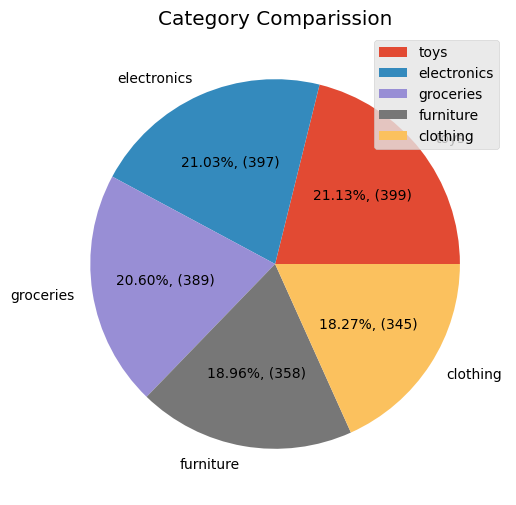

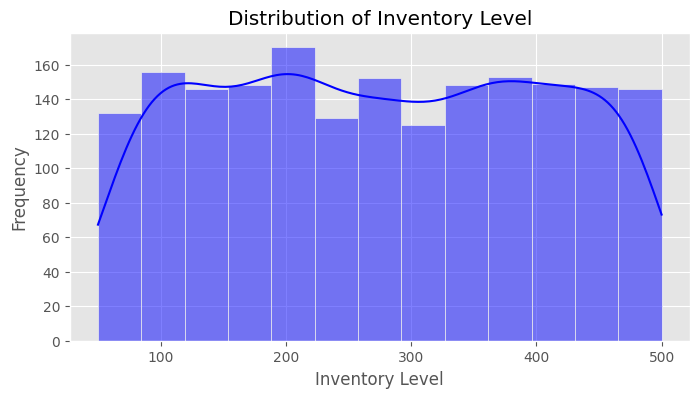

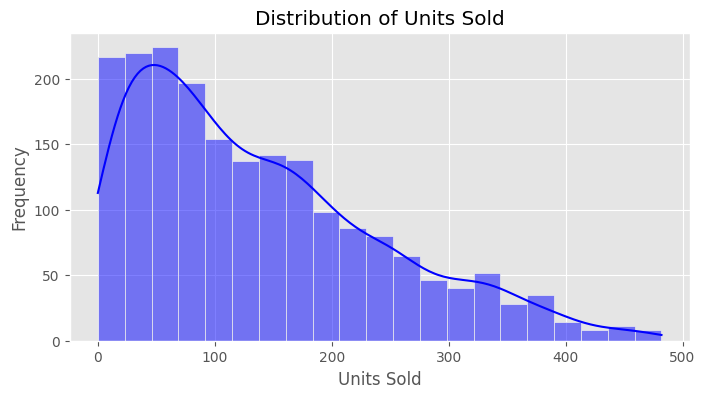

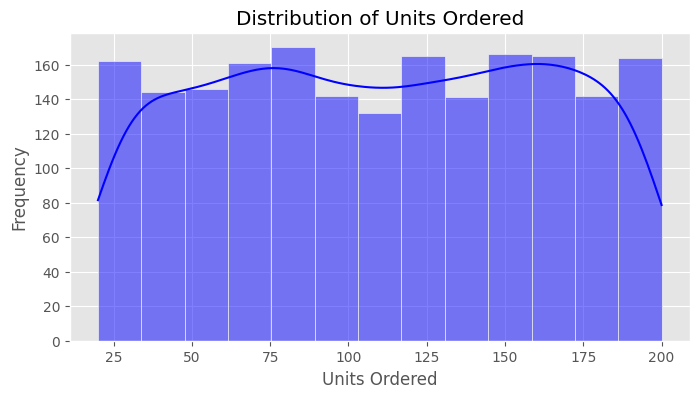

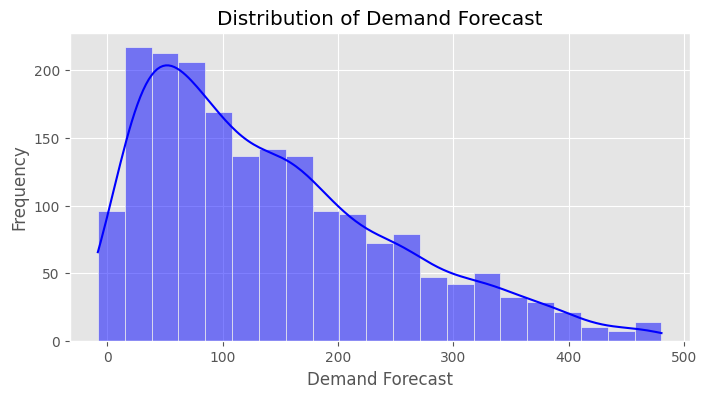

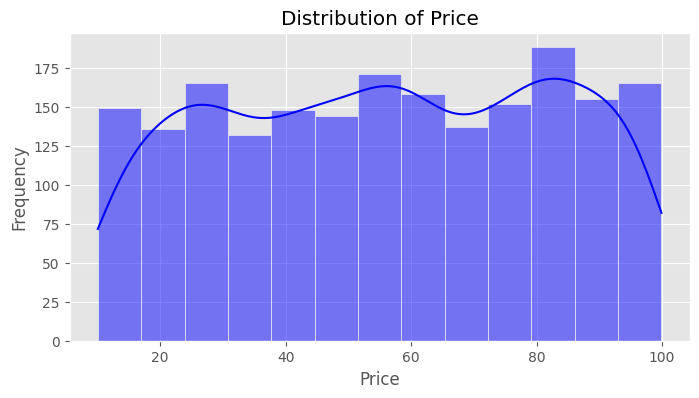

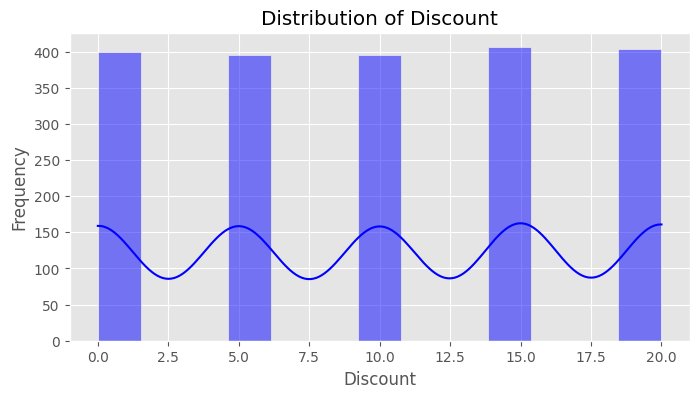

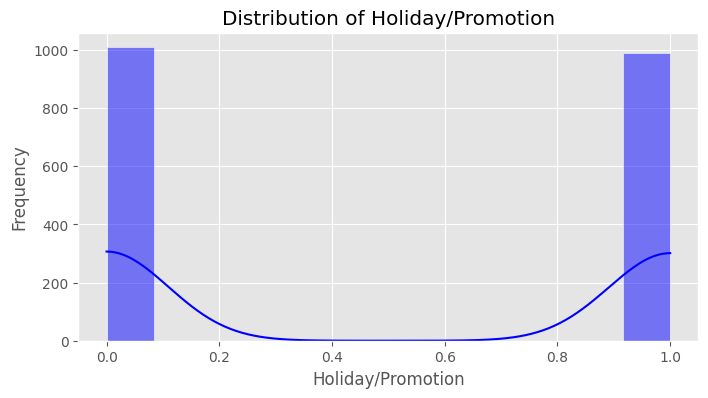

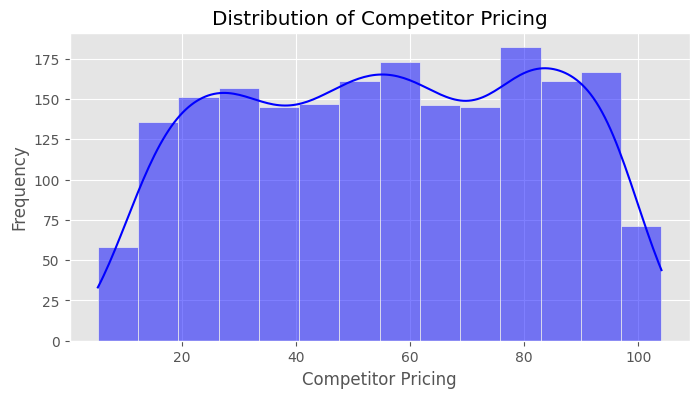

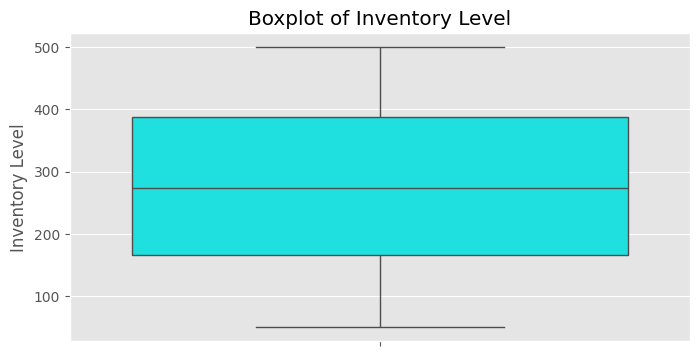

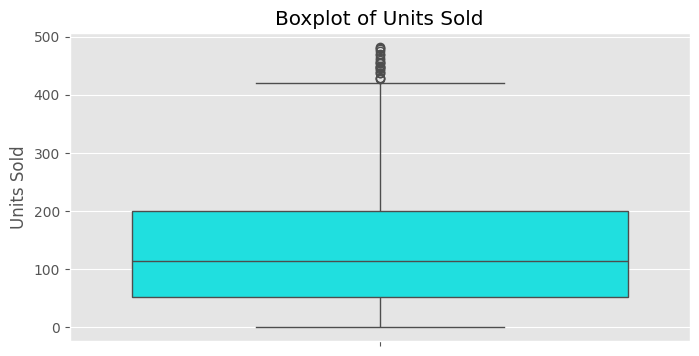

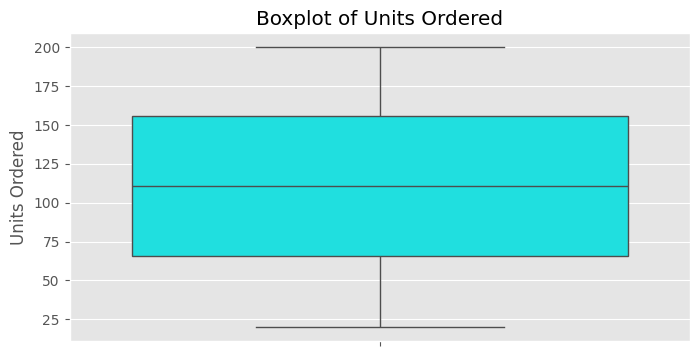

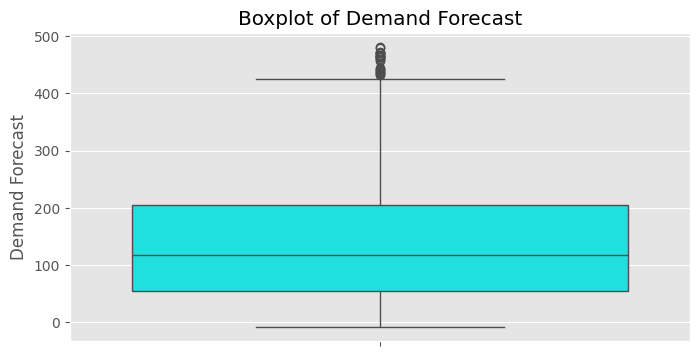

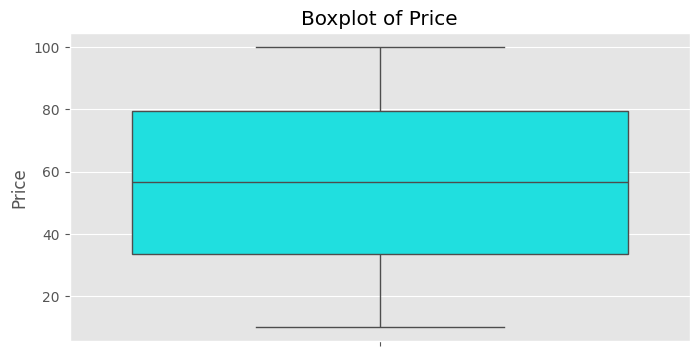

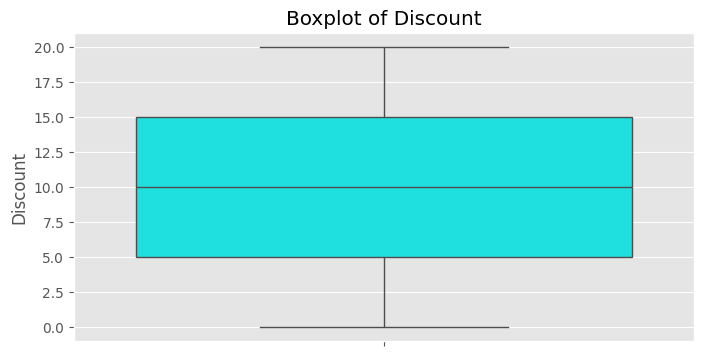

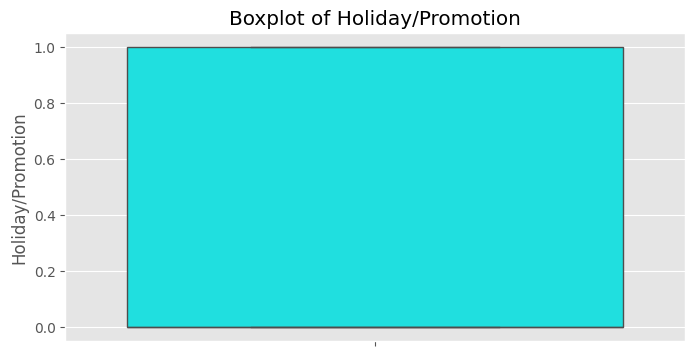

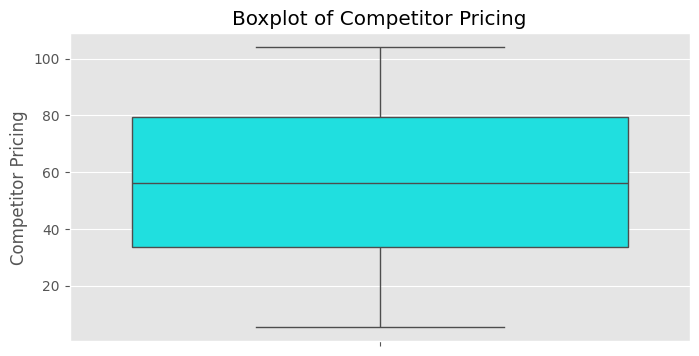

In [123]:
#univariate analysis

# Column Data: category

classes = df['Category'].value_counts().index
vals = df['Category'].value_counts().values
plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.pie(x = vals, labels = classes, autopct=lambda p:f'{p:.2f}%, ({p*sum(vals)/100 :.0f})', explode=[0, 0, 0, 0, 0])

plt.title("Category Comparission")
plt.legend()
plt.show()


# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col], color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.show()



* Inventory Levels: Stock levels are consistent, showing balanced demand or steady restocking practices.
* Units Sold: Most sales are for smaller quantities, with large orders being less common.
* Units Ordered: Orders are placed in similar quantities, indicating consistent purchasing behavior.
* Demand Forecasts: Predictions mostly focus on lower demand, with occasional high-demand expectations.
* Prices: Prices are spread evenly, with only minor changes at the high and low ends.
* Discounts: Discounts fall into clear tiers, like 0%, 5%, 10%, etc.
* Promotions: Most values are either 0 or 1, likely representing whether a promotion is active or not.


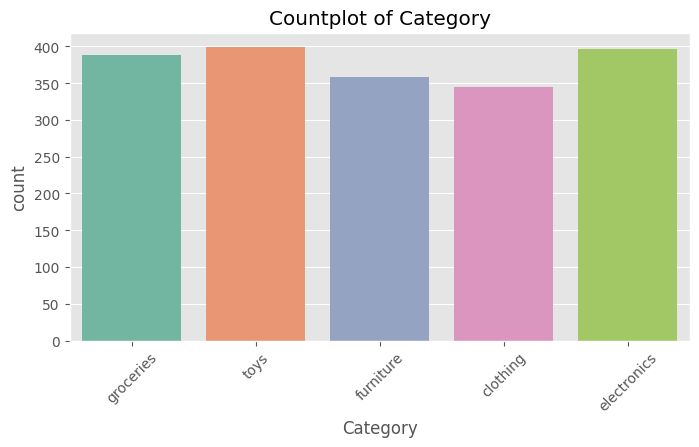

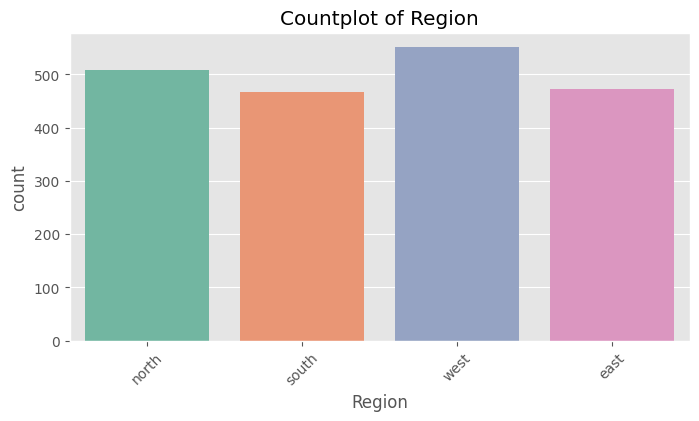

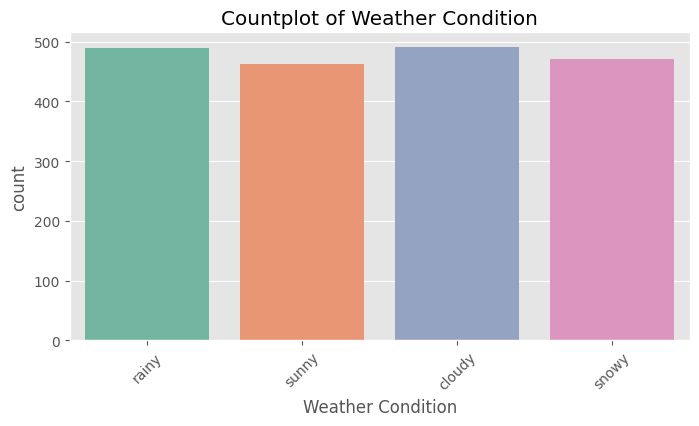

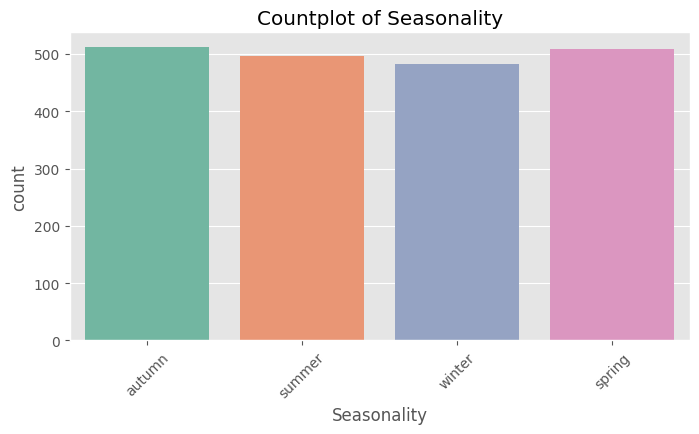

In [124]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Bar charts
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

* Category: Groceries, toys, and electronics are the most popular product categories.
* Region: The North region has the highest number of purchases, followed by the South.
* Weather Condition: Sunny days have the highest number of purchases, followed by rainy days.
* Seasonality: Purchases are highest in the autumn season, followed by summer.

Text(0.5, 1.0, 'Distribution of Data Across Months')

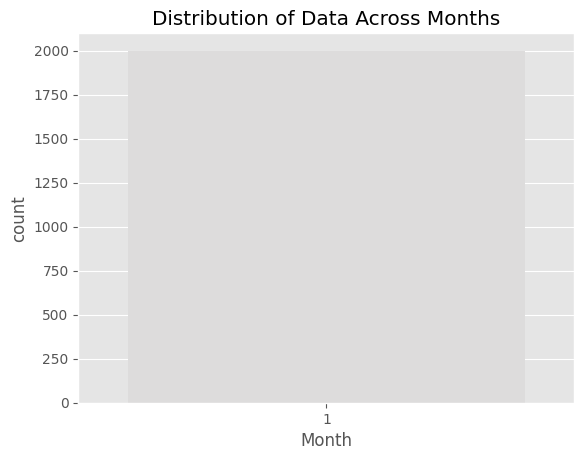

In [125]:
sns.countplot(x='Month', data=df, palette='coolwarm')
plt.title('Distribution of Data Across Months')


* The distribution of data across months shows a slight dip from January to February, then a steady increase until a peak in December.

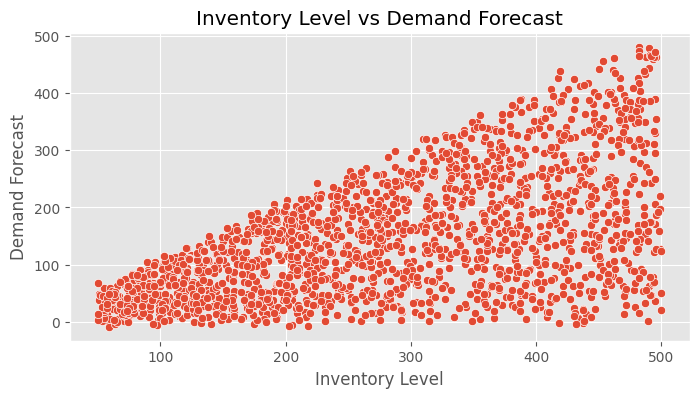

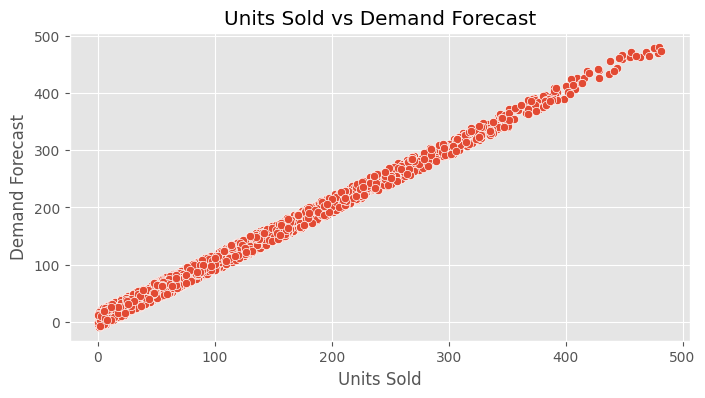

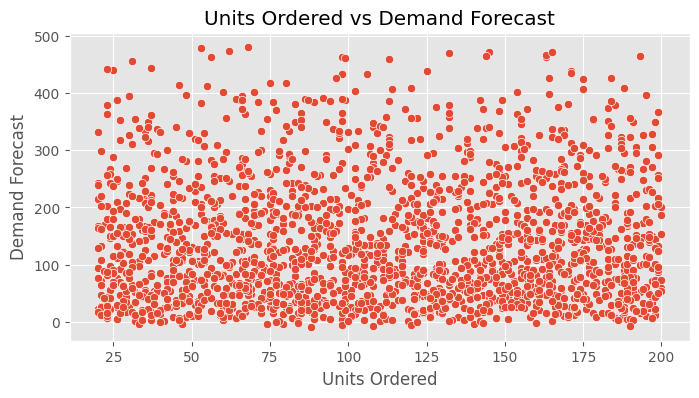

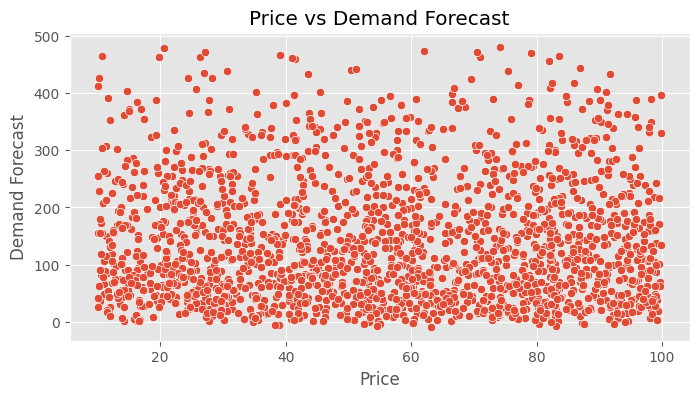

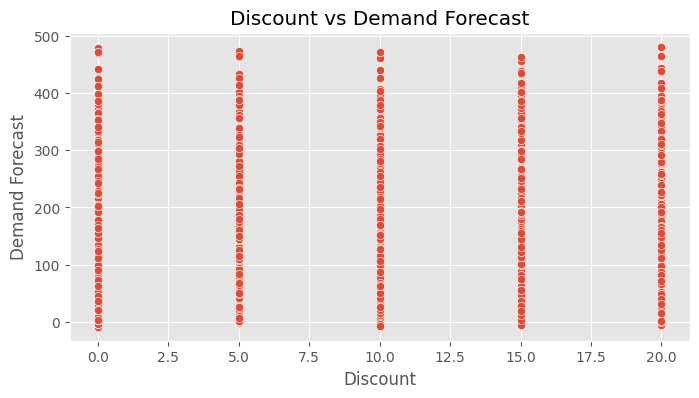

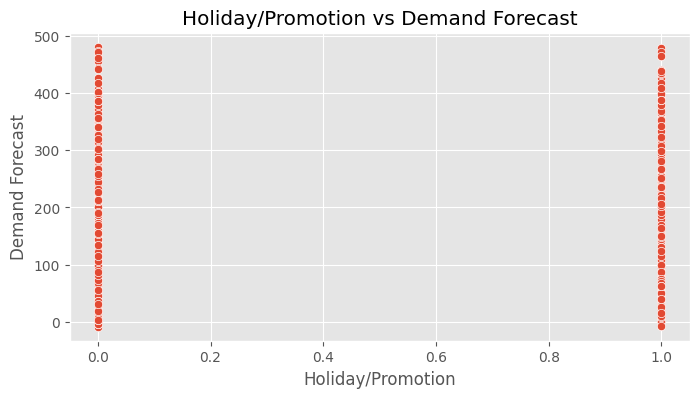

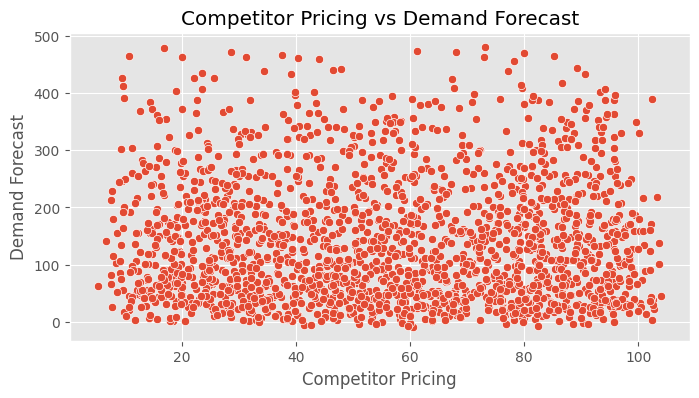

In [126]:
#Bivariate analysis
#Scatter plots for numerical columns
for col in numerical_cols:
    if col != 'Demand Forecast':  # Replace 'Demand Forecast' with your target column if applicable
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df['Demand Forecast'])#DF
        plt.title(f'{col} vs Demand Forecast')
        plt.xlabel(col)
        plt.ylabel('Demand Forecast')
        plt.show()


* **Interventory level vd Demand Forecast** : The demand forecast generally increases with the inventory level, but there is also significant variation at each level.
* **Units sold vs Demand Forecast** : The demand forecast closely matches the actual units sold, indicating a high degree of accuracy in the forecasting model.
* **Units ordered vs Demand Forecast** : The demand forecast for units ordered ranges from around 25 to 200, with a wide distribution across this range.
* **Price vs Demand Forecast** : The demand forecast remains relatively consistent across a wide range of prices
* **Discount vs Demand Forecast** : The demand forecast remains consistent across different discount levels, showing no strong correlation between the two variables.
* **Holiday Promotion vs Demand Forecast** :
The demand forecast shows similar distributions regardless of whether a holiday/promotion is active or not, suggesting limited impact.
* **Competitor pricing vs Demand Forecast** : The demand forecast remains relatively consistent across a wide range of competitor prices.

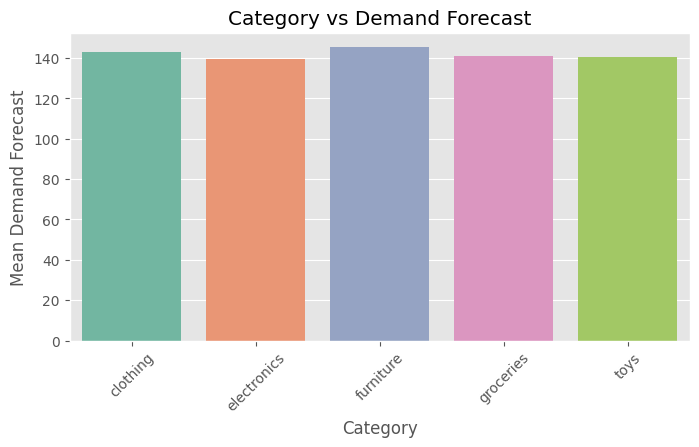

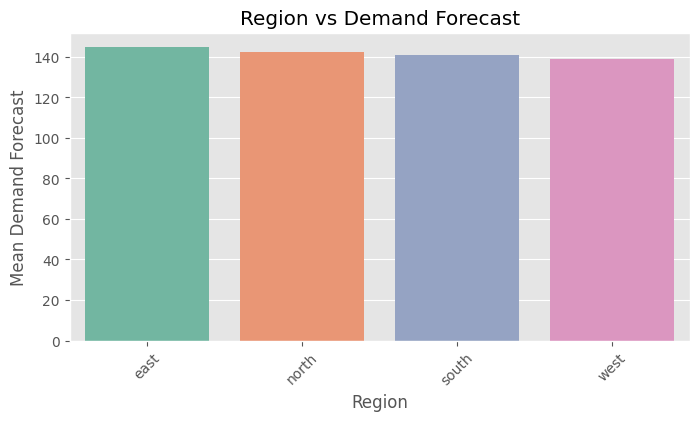

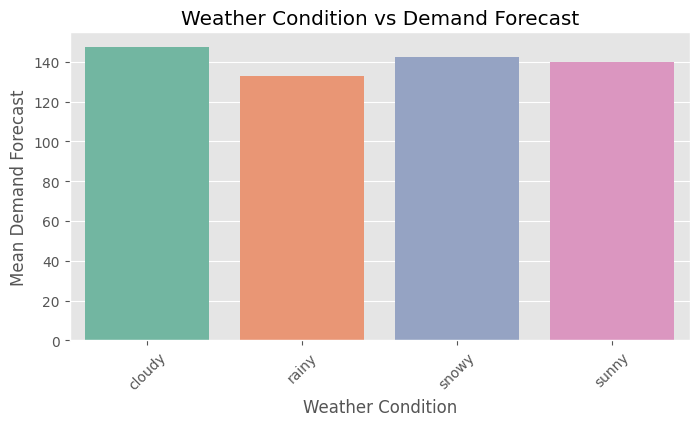

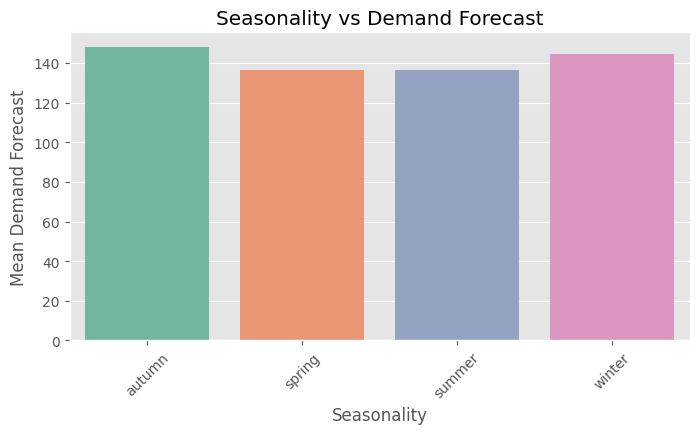

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar charts for categorical vs numerical
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    # Calculate the mean of 'Units Sold' for each category
    category_means = df.groupby(col)['Demand Forecast'].mean().reset_index()

    # Plot the bar chart
    sns.barplot(x=col, y='Demand Forecast', data=category_means, palette='Set2')#Demand forecast change

    plt.title(f'{col} vs Demand Forecast')
    plt.xticks(rotation=45)
    plt.ylabel('Mean Demand Forecast')
    plt.show()



* **Category vs Demand Forecast** : Electronics and toys have the highest average demand forecast, while groceries have the lowest.
* **Region vs Demand Forecast** : The East and West regions have the highest average demand forecast, with the North and South regions being slightly lower.
* **Weather Condition vs Demand Forecast** : Sunny days have the highest average demand forecast, while cloudy days have the lowest.
* **Seasonality vs Demand Forecast** : Autumn and Winter have the highest average demand forecast, with Spring and Summer being slightly lower.

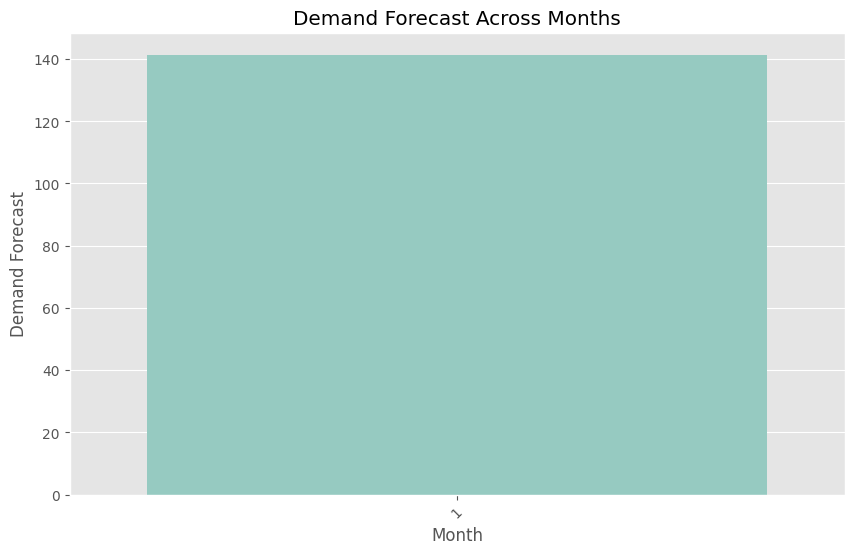

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean demand forecast for each month
monthly_means = df.groupby('Month')['Demand Forecast'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Demand Forecast', data=monthly_means, palette='Set3')

# Update the title and axis labels
plt.title('Demand Forecast Across Months')
plt.xlabel('Month')
plt.ylabel('Demand Forecast')
plt.xticks(rotation=45)
plt.show()

* From the above graph we can say that, The demand forecast shows a slight dip from January to February, then a steady increase until a peak in December.

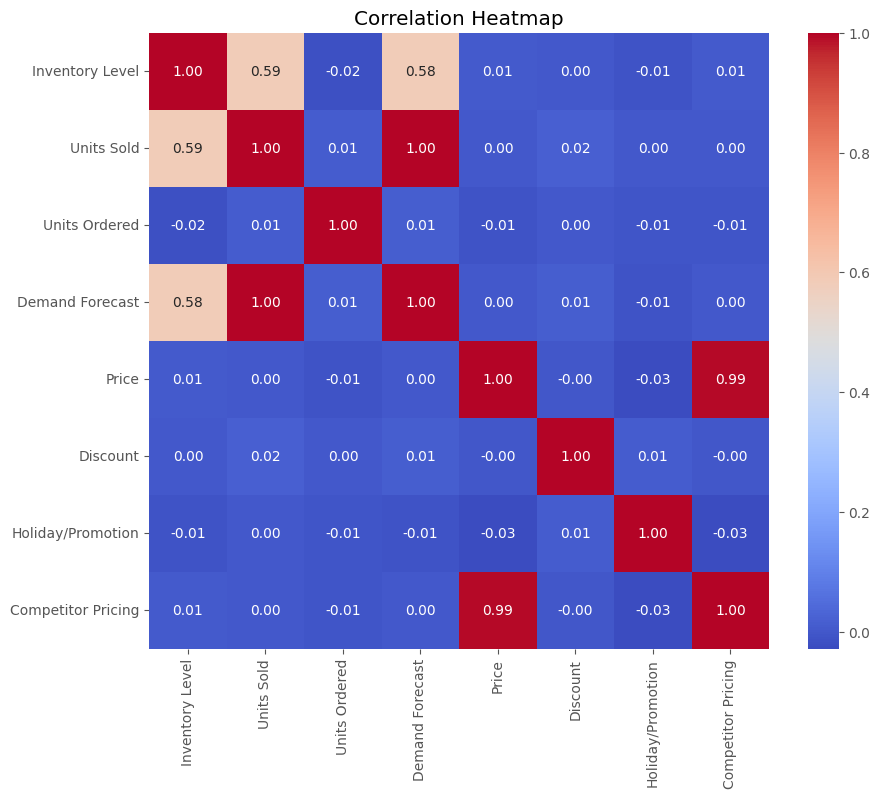

In [129]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


* **Inventory Level** : There's a moderate positive correlation between inventory level and demand forecast. This suggests that having higher inventory levels might positively impact demand forecasting.
* **Units Sold** : There's a strong positive correlation between units sold and demand forecast. This is expected, as higher sales would likely lead to more accurate demand forecasts.
* **Units Ordered** : There's a weak negative correlation between units ordered and demand forecast. This might indicate that over-ordering could potentially lead to less accurate forecasts.
* **Price** : There's a very weak negative correlation between price and demand forecast. This suggests that price might have a very slight impact on demand forecasting, but it's not a major factor.
* **Discount and Holiday/Promotion** : These factors have a very weak correlation with demand forecast. This suggests that while discounts and promotions might impact sales, their impact on demand forecasting might be minimal.
* **Competitor Pricing** : There's a very weak correlation between competitor pricing and demand forecast. This suggests that competitor pricing might have a very slight impact on demand forecasting, but it's not a major factor.

Overall, the factors that seem to have the most significant impact on demand forecasting are inventory level and units sold.

**NA & Outliers**

In [130]:
df.isnull().sum()

,0
Date,0
Category,112
Region,0
Inventory Level,99
Units Sold,0
Units Ordered,0
Demand Forecast,90
Price,0
Discount,0
Weather Condition,87


In [131]:
# Handle missing values (fill or drop, depending on the context)
# Example: Filling numerical columns with the mean and categorical with the mode

df['Inventory Level'].fillna(df['Inventory Level'].mean(), inplace=True)
df['Demand Forecast'].fillna(df['Demand Forecast'].mean(), inplace=True)
df['Weather Condition'].fillna(df['Weather Condition'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)


In [132]:
df.isnull().sum()

,0
Date,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0
Discount,0
Weather Condition,0


**Outliers Handling**

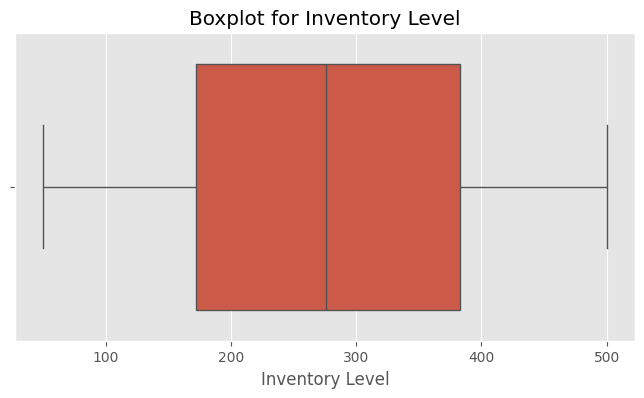

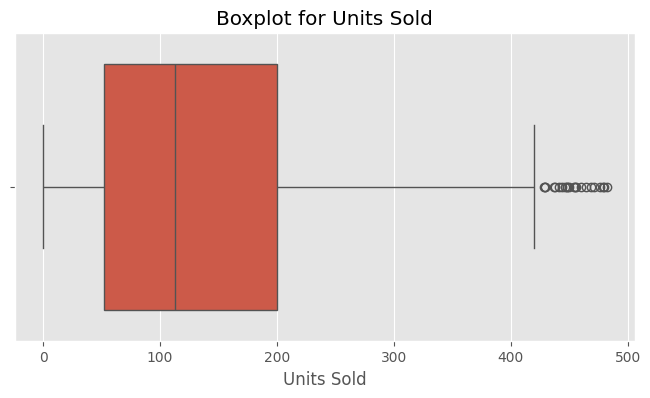

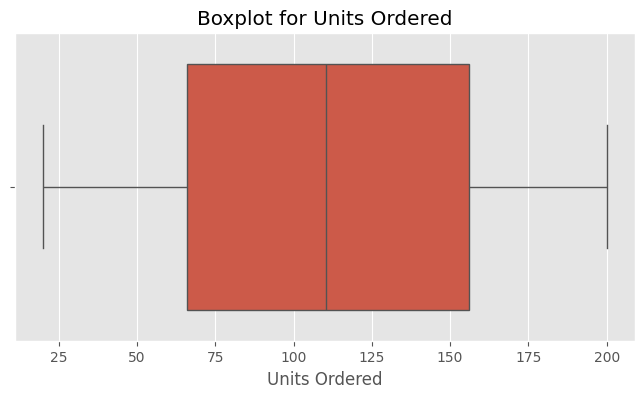

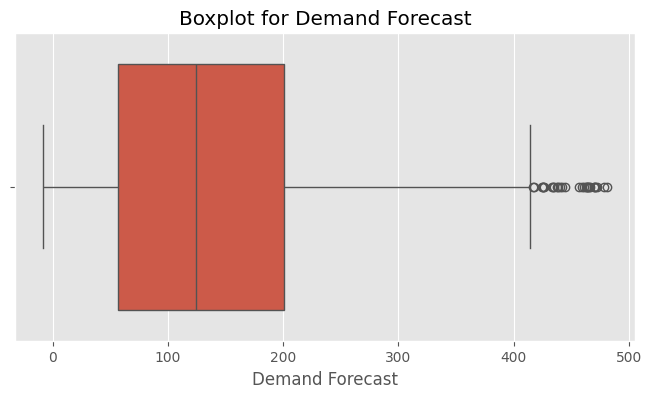

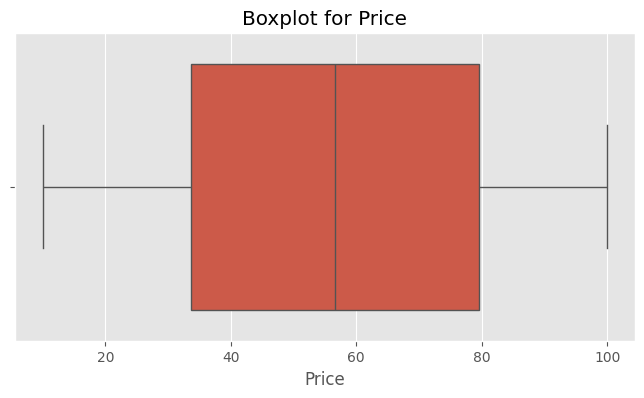

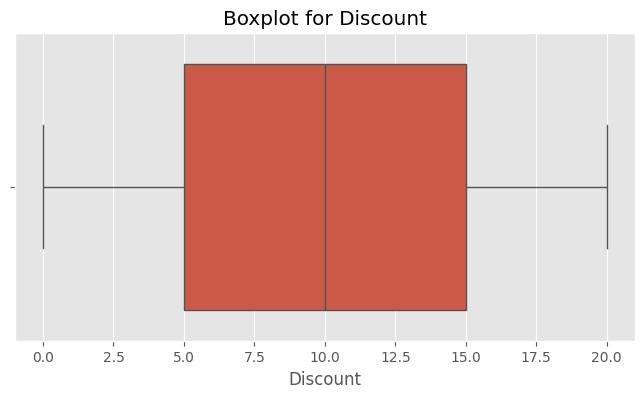

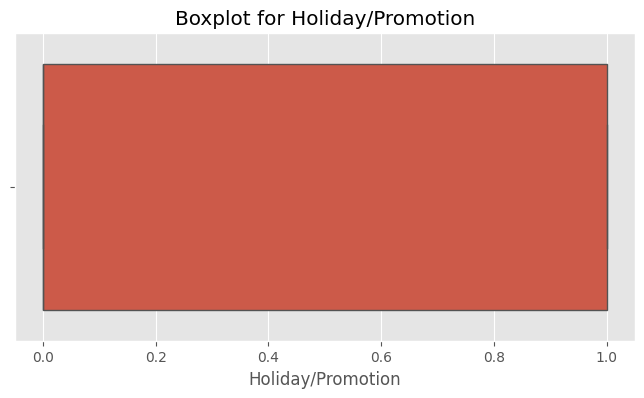

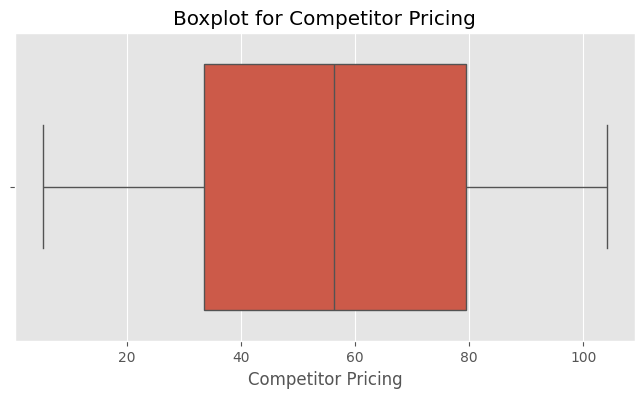

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


### Inventory Level:

- Most inventory levels are close to 300.
- Inventory values typically range between 200 and 400, with an overall range of 100 to 500.
- There are no extreme or unusual values.

### Units Sold:

- Most units sold are below 300, with a median of around 100–150 units.
- Some outliers exist, showing unusually high sales above 400.
- Sales data is slightly skewed, with a few higher values pulling the average up.

### Units Ordered:

- Orders typically range between 75 and 150 units, with a median of around 125 units.
- The data is consistent and symmetrical, with no unusual outliers.

### Demand Forecast:

- Forecasted demand mostly falls between 50 and 300, with a median around 150–200.
- There are occasional high forecasts above 400, indicating rare predictions of strong demand.
- The data is slightly skewed toward higher forecasts.

### Price:

- Most prices are between 40 and 80, with a median price of about 60.
- Prices range from 20 to 100, and there are no extreme values or outliers.

### Discount:

- Discounts generally fall between 7.5 and 12.5, with a median of about 10.
- Discounts range from 0 to 20, with no significant outliers.

### Holiday/Promotion:

- The data suggests a binary variable (0 or 1), indicating whether a holiday or promotion is present.
- The uniform distribution shows no variability beyond these two categories.

### Competitor Pricing:

- Competitor prices show moderate variation, with most prices in the middle 50% of the range.
- The whiskers indicate the full range of competitor prices, but no extreme values are observed.
---------------------------
- Inventory, price, and discount levels are consistent, with no extreme values.
- Units sold and demand forecasts show some higher values (outliers), indicating occasional spikes.
- Units ordered are steady and symmetrical, while holiday/promotion data is binary and straightforward.
- Competitor pricing shows a moderate spread, suggesting slight variability in market prices.

In [134]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to exclude outliers
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Apply the function to each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

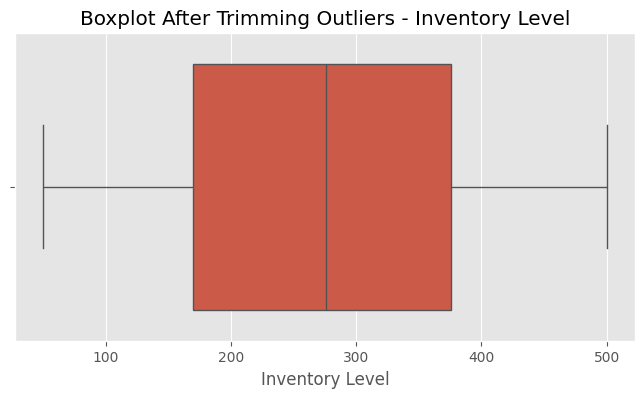

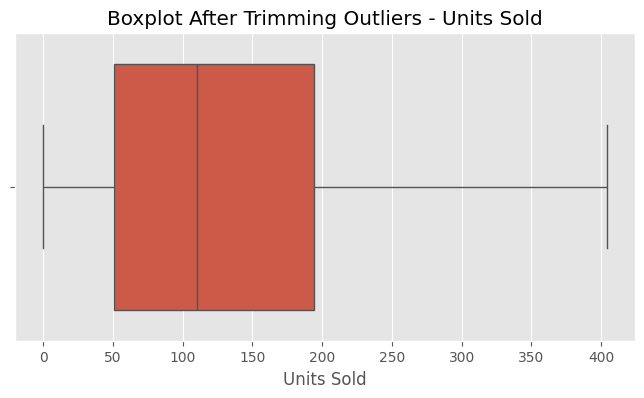

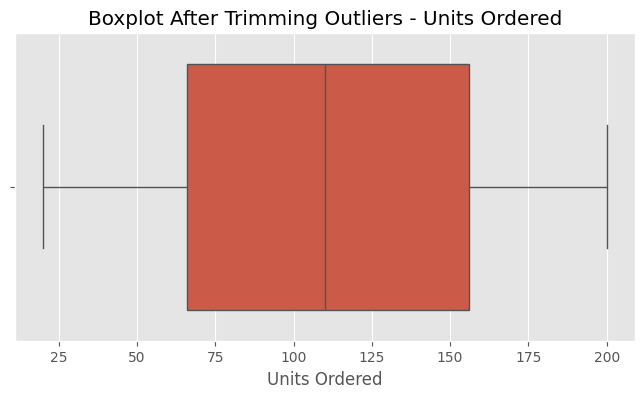

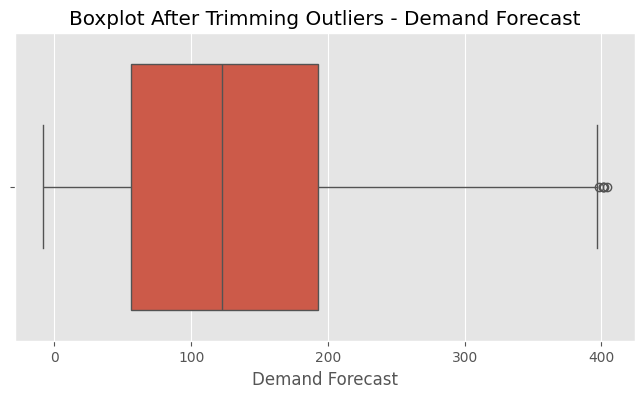

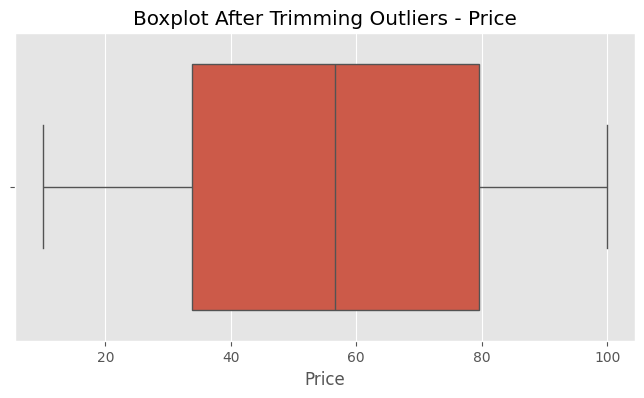

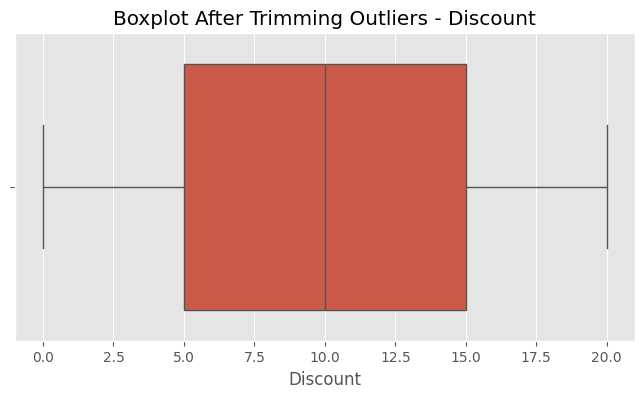

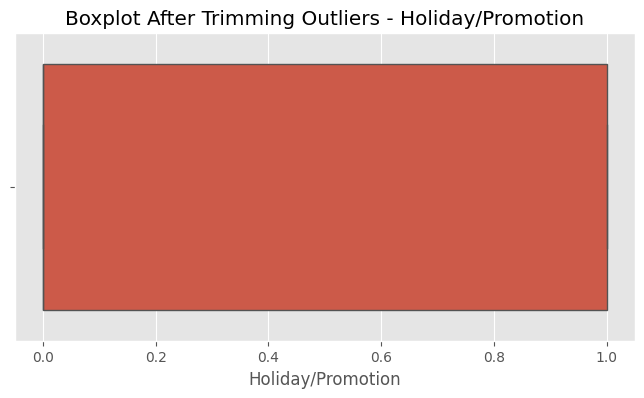

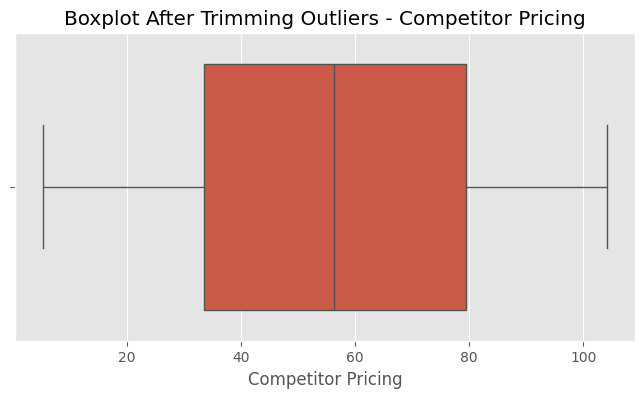

Dataset shape after removing outliers: (1964, 16)


In [135]:
# Plot boxplots after trimming
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Trimming Outliers - {col}')
    plt.show()

# Check the shape of the dataset
print(f"Dataset shape after removing outliers: {df.shape}")

**Predictive Modeling**

### Predictive Modeling:
- The process of using data and algorithms to build a model that can predict future outcomes or trends.



In [136]:
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Hour,Week,Month
0,2022-01-01,groceries,north,231.000,127,55,135.470,33.500,20,rainy,0,29.690,autumn,0,52,1
1,2022-01-01,toys,south,204.000,150,66,144.040,63.010,20,sunny,0,66.160,autumn,0,52,1
2,2022-01-01,toys,west,102.000,65,51,74.020,27.990,10,sunny,1,31.320,summer,0,52,1
3,2022-01-01,toys,north,469.000,61,164,62.180,32.720,10,cloudy,1,34.740,autumn,0,52,1
4,2022-01-01,toys,east,166.000,14,135,9.260,73.640,0,sunny,0,68.950,summer,0,52,1


 The data into X (features) and y (target). X includes all columns except 'Demand Forecast', and y is the 'Demand Forecast' column, which we want to predict.

In [137]:
X = df.drop('Demand Forecast', axis = 1)
y = df['Demand Forecast']

In [138]:
X.head(2)

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Hour,Week,Month
0,2022-01-01,groceries,north,231.000,127,55,33.500,20,rainy,0,29.690,autumn,0,52,1
1,2022-01-01,toys,south,204.000,150,66,63.010,20,sunny,0,66.160,autumn,0,52,1


In [139]:
y.head(2)

,Demand Forecast
0,135.470
1,144.040


**Feature Engineering**

### Feature Engineering:
- Creating new features or modifying existing ones to improve the performance of a model.

In [140]:
X.head(2)

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Hour,Week,Month
0,2022-01-01,groceries,north,231.000,127,55,33.500,20,rainy,0,29.690,autumn,0,52,1
1,2022-01-01,toys,south,204.000,150,66,63.010,20,sunny,0,66.160,autumn,0,52,1


In [141]:
X.columns

Index(['Date', 'Category', 'Region', 'Inventory Level', 'Units Sold',
       'Units Ordered', 'Price', 'Discount', 'Weather Condition',
       'Holiday/Promotion', 'Competitor Pricing', 'Seasonality', 'Hour',
       'Week', 'Month'],
      dtype='object')

**Feature selection / deletion**

### Feature Selection / Deletion:
- Choosing the most relevant features for the model and removing unnecessary ones to improve accuracy and reduce complexity.

Removing the columns 'Date', 'Hour', 'Week', and 'Month' from the feature set X as they are likely not needed for the model.

In [142]:
X.drop(['Date','Hour','Week','Month'], axis = 1, inplace = True)
X.head(2)

,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,groceries,north,231.000,127,55,33.500,20,rainy,0,29.690,autumn
1,toys,south,204.000,150,66,63.010,20,sunny,0,66.160,autumn


In [143]:
X.shape

(1964, 11)

Saving the feature data X to a CSV file named "DemandForecast.csv", which can be used for model deployment or making predictions.

In [144]:
# Saving above input data for model deployment
X.to_csv("DemandForecast.csv", index=False)

**Feature Modification**

### Feature Modification:
- It means changing or adjusting the data to make it better for the model, like scaling numbers or combining columns.

Encoding: - Converting Categorical Cols to Numeric

In [145]:
# Selecting Object Type Cols
X.select_dtypes("O")

,Category,Region,Weather Condition,Seasonality
0,groceries,north,rainy,autumn
1,toys,south,sunny,autumn
2,toys,west,sunny,summer
3,toys,north,cloudy,autumn
4,toys,east,sunny,summer
...,...,...,...,...
1995,electronics,north,rainy,autumn
1996,toys,south,snowy,winter
1997,toys,west,rainy,winter
1998,toys,south,cloudy,summer


In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1964 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            1964 non-null   object 
 1   Region              1964 non-null   object 
 2   Inventory Level     1964 non-null   float64
 3   Units Sold          1964 non-null   int64  
 4   Units Ordered       1964 non-null   int64  
 5   Price               1964 non-null   float64
 6   Discount            1964 non-null   int64  
 7   Weather Condition   1964 non-null   object 
 8   Holiday/Promotion   1964 non-null   int64  
 9   Competitor Pricing  1964 non-null   float64
 10  Seasonality         1964 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 184.1+ KB


Performing feature encoding on categorical columns in the dataset. It uses one-hot encoding for nominal columns like Category, Region, and Weather Condition to convert them into binary columns and ordinal encoding for the Seasonality column based on predefined rankings. It also handles any missing values by filling them with a default value - 0 in this case and ensures that all columns are numeric, making the dataset ready for model training.

In [147]:

# Assuming X already contains the independent data with categorical columns
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
# Separate columns for one-hot and ordinal encoding
nominal_cols = ['Category', 'Region', 'Weather Condition']  # Nominal columns
ordinal_cols = ['Seasonality']  # Ordinal columns
# One-Hot Encoding for Nominal Columns
X_nominal_encoded = pd.get_dummies(X[nominal_cols])  # Encode nominal columns
# Ensure all encoded columns are numeric (0 or 1)
X_nominal_encoded = X_nominal_encoded.astype(int)
# Define the mapping for ordinal encoding (adjust for case sensitivity)
seasonality_order = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
# Map the values using the dictionary for 'Seasonality'
X['Seasonality'] = X['Seasonality'].map(seasonality_order)
# Check for any NaN values after mapping
if X['Seasonality'].isnull().any():
    print("Unmapped or missing values detected in 'Seasonality'. Filling with NaN values.")
    median_seasonality = X['Seasonality'].median()
    X['Seasonality'] = X['Seasonality'].fillna(median_seasonality)
# Combine the one-hot-encoded columns with the rest of the data
X = pd.concat([X.drop(columns=nominal_cols), X_nominal_encoded], axis=1)
# Handle any NaN values in the whole DataFrame
X = X.fillna(0)
# Verify the updated DataFrame
print(X.head())
# Confirm all columns are numeric
print(X.dtypes)


   Inventory Level  Units Sold  Units Ordered  Price  Discount  \
0          231.000         127             55 33.500        20   
1          204.000         150             66 63.010        20   
2          102.000          65             51 27.990        10   
3          469.000          61            164 32.720        10   
4          166.000          14            135 73.640         0   

   Holiday/Promotion  Competitor Pricing  Seasonality  Category_clothing  \
0                  0              29.690            3                  0   
1                  0              66.160            3                  0   
2                  1              31.320            2                  0   
3                  1              34.740            3                  0   
4                  0              68.950            2                  0   

   Category_electronics  ...  Category_groceries  Category_toys  Region_east  \
0                     0  ...                   1              0   

**Scaling**

Scaling makes it easier for models to process numerical input by bringing its values into a similar range. Because of their value ranges, Normalization and standardization are popular approaches.

In [148]:
X.head(3)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_clothing,Category_electronics,...,Category_groceries,Category_toys,Region_east,Region_north,Region_south,Region_west,Weather Condition_cloudy,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny
0,231.000,127,55,33.500,20,0,29.690,3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,204.000,150,66,63.010,20,0,66.160,3,0,0,...,0,1,0,0,1,0,0,0,0,1
2,102.000,65,51,27.990,10,1,31.320,2,0,0,...,0,1,0,0,0,1,0,0,0,1


Import the StandardScaler from scikit-learn and creates an object sc to scale numerical data, transforming it to have a mean of 0 and a standard deviation of 1.

In [149]:
# Module
from sklearn.preprocessing import StandardScaler
# Object Define
sc = StandardScaler()

Selecting the main numerical columns and ignoring one-hot encoded columns and applies scaling using StandardScaler. It transforms these columns so that they have a mean of 0 and a standard deviation of 1, making the data ready for model training.

In [150]:
# Considering only the main numeric cols, not one hot encoded cols
X.iloc[:, [0,1,2,3,4,5,6,7]]

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality
0,231.000,127,55,33.500,20,0,29.690,3
1,204.000,150,66,63.010,20,0,66.160,3
2,102.000,65,51,27.990,10,1,31.320,2
3,469.000,61,164,32.720,10,1,34.740,3
4,166.000,14,135,73.640,0,0,68.950,2
...,...,...,...,...,...,...,...,...
1995,63.000,8,105,64.070,0,0,66.230,3
1996,359.000,326,190,34.590,5,1,32.070,4
1997,172.000,26,186,65.100,20,0,67.630,4
1998,298.000,264,147,27.730,20,0,29.560,2


In [151]:
# Applying fit_transform on selected cols
X.iloc[:, [0,1,2,3,4,5,6,7]] = sc.fit_transform(X.iloc[:, [0,1,2,3,4,5,6,7]])

* **Final X Data After feature engineering**

In [152]:
X

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_clothing,Category_electronics,...,Category_groceries,Category_toys,Region_east,Region_north,Region_south,Region_west,Weather Condition_cloudy,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny
0,-0.330,-0.044,-1.058,-0.874,1.405,-0.993,-1.017,0.470,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-0.547,0.190,-0.848,0.265,1.405,-0.993,0.380,0.470,0,0,...,0,1,0,0,1,0,0,0,0,1
2,-1.365,-0.674,-1.134,-1.086,-0.007,1.007,-0.955,-0.428,0,0,...,0,1,0,0,0,1,0,0,0,1
3,1.578,-0.715,1.025,-0.904,-0.007,1.007,-0.824,0.470,0,0,...,0,1,0,1,0,0,1,0,0,0
4,-0.851,-1.192,0.471,0.675,-1.419,-0.993,0.487,-0.428,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.677,-1.253,-0.102,0.306,-1.419,-0.993,0.383,0.470,0,1,...,0,0,0,1,0,0,0,1,0,0
1996,0.696,1.978,1.522,-0.832,-0.713,1.007,-0.926,1.367,0,0,...,0,1,0,0,1,0,0,0,1,0
1997,-0.803,-1.070,1.445,0.345,1.405,-0.993,0.437,1.367,0,0,...,0,1,0,0,0,1,0,1,0,0
1998,0.207,1.348,0.700,-1.096,1.405,-0.993,-1.022,-0.428,0,0,...,0,1,0,0,1,0,1,0,0,0


**Train-test-split**

- Train-test split means dividing the data into two parts: one part is used to train the model, and the other part is used to test how well the model performs. This helps check if the model works well on new, unseen data.

Splits the dataset into training and testing sets. 25% of the data is used for testing, and the rest is used for training. The shapes of the training and testing sets are displayed to show how the data has been divided.

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=42)

In [155]:
xtrain.shape, xtest.shape

((1473, 21), (491, 21))

In [156]:
xtrain.head(2)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_clothing,Category_electronics,...,Category_groceries,Category_toys,Region_east,Region_north,Region_south,Region_west,Weather Condition_cloudy,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny
755,-1.533,-0.969,-0.790,-1.138,-0.007,1.007,-1.050,-1.325,1,0,...,0,0,1,0,0,0,1,0,0,0
340,0.504,1.419,0.700,0.959,1.405,-0.993,1.050,-0.428,0,0,...,0,0,0,0,1,0,0,1,0,0


In [157]:
xtest.head(2)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_clothing,Category_electronics,...,Category_groceries,Category_toys,Region_east,Region_north,Region_south,Region_west,Weather Condition_cloudy,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny
952,0.027,-0.654,0.242,1.222,-1.419,-0.993,1.056,1.367,0,0,...,0,0,1,0,0,0,1,0,0,0
1025,1.386,1.480,1.216,0.063,0.699,-0.993,-0.015,-0.428,0,0,...,0,1,0,1,0,0,0,1,0,0


In [158]:
ytrain.shape, ytest.shape

((1473,), (491,))

**Modeling Procedure**:

* Model Define
* Model Training
* Checking Model Param
* Evaluation - Metrics, Cross validation
* Feature importance
* Visualizations
* Bias-Variance
* Real time prediction

**Concept & Libraries**

Model Define & Training

* We have output data numeric, considering regression algorithms

    - **Regression Models/Algorithms:**
            - Linear Regression
            - Polynomial Regression
            - Lasso & Ridge Regression
            - Support Vector Regressor
            - KNN Regressor
            - Decision Tree Regressor
            - RandomForest Regressor
            - Xgboost Regressor
            


In [159]:
# Algorithm Modules
# Linear Regression
from sklearn.linear_model import LinearRegression

# Polynomial Regression (using PolynomialFeatures for feature transformation)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as PolyLinearRegression

# L1 (Lasso) and L2 (Ridge) Regularization (Ridge and Lasso Regression)
from sklearn.linear_model import Lasso, Ridge

# Support Vector Machine Regression (SVM)
from sklearn.svm import SVR

# K-Nearest Neighbors Regression (KNN)
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# XGBoost Regression
import xgboost as xgb
from xgboost import XGBRegressor


#### Modeling - Defining & Training <a id='model'>


* Defining Models

In [160]:
# Linear Regression
mlr = LinearRegression()

# Polynomial Regression (using PolynomialFeatures for feature transformation)
polyfeat = PolynomialFeatures(degree=2)  # Hyperparameter: degree of polynomial
poly = LinearRegression()  # Linear regression on the transformed polynomial features

# Lasso (L1 Regularization) and Ridge (L2 Regularization) Regression
lasso = Lasso(alpha=0.1)  # Hyperparameter: alpha (penalty term for L1 regularization)
ridge = Ridge(alpha=1.0)  # Hyperparameter: alpha (penalty term for L2 regularization)

# Support Vector Machine Regression (SVM)
svr = SVR(kernel='rbf')  # Radial basis function kernel for non-linear data

# K-Nearest Neighbors Regression (KNN)
knn = KNeighborsRegressor(n_neighbors=5)  # Hyperparameter: n_neighbors (number of nearest neighbors)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=0)  # Random state for reproducibility

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=0)  # Hyperparameter: n_estimators (number of trees)

# XGBoost Regression
xgb_regressor = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0)  # Hyperparameters: learning_rate, n_estimators, max_depth


* **Training**

    * Using xtrain, ytrain data
    * Using fit method to train the defined model with xtrain, ytrain

**Linear regression**

### Linear Regression: It predicts a value by drawing a straight line that best fits the data points.

Linear Regression model using the training data (xtrain and ytrain). It then give the model's coefficients and intercept, which represent the relationship between the features and the target variable. The equation for the linear regression model is constructed by combining the intercept and each feature's coefficient.

In [161]:
# Model Training
mlr.fit(xtrain, ytrain)

LinearRegression()

In [162]:
mlr.coef_, mlr.intercept_

(array([ 0.31348564, 94.03605775,  0.51722314,  2.54365148, -0.53098358,
        -1.21483169, -2.2394631 ,  0.12244126,  0.56597378, -2.33557533,
         0.80670252, -0.16234166,  1.12524069,  0.18957253,  1.34412436,
         0.12556637, -1.65926326, -0.20836137,  0.32605703, -0.80324915,
         0.68555349]),
 135.9779625873511)

In [163]:
eq = str(mlr.intercept_)
for i,j in zip(xtrain.columns,mlr.coef_):
    mx = '{}*{}'.format(i,j)
    eq = eq+") + ("+mx

In [164]:
eq

'135.9779625873511) + (Inventory Level*0.31348563750248587) + (Units Sold*94.03605774569911) + (Units Ordered*0.5172231367895027) + (Price*2.5436514824595435) + (Discount*-0.5309835785304791) + (Holiday/Promotion*-1.2148316876876255) + (Competitor Pricing*-2.239463099485458) + (Seasonality*0.12244126104869235) + (Category_clothing*0.5659737828757117) + (Category_electronics*-2.3355753297664585) + (Category_furniture*0.8067025195722086) + (Category_groceries*-0.1623416626174255) + (Category_toys*1.1252406899359593) + (Region_east*0.18957252684162063) + (Region_north*1.3441243588783054) + (Region_south*0.12556637485504682) + (Region_west*-1.6592632605749753) + (Weather Condition_cloudy*-0.20836136884895318) + (Weather Condition_rainy*0.3260570308392179) + (Weather Condition_snowy*-0.8032491502392253) + (Weather Condition_sunny*0.6855534882489716'

**Polynomial Regression**

### Polynomial Regression: It predicts a value by fitting a curve instead of a straight line, useful when the relationship between variables is more complex.


**The Dimensionality will become more and will take heavy run time if we take all the inputs**

- Selecting Features: The code picks only the first 7 columns to avoid memory issues.
- Polynomial Features: It transforms the data into polynomial features to capture more complex patterns.
- Training: The Polynomial Regression model is trained on the transformed data.
- Model Parameters: The model’s coefficients and intercept are retrieved to understand its behavior.

In [165]:
xtrain.head(2)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_clothing,Category_electronics,...,Category_groceries,Category_toys,Region_east,Region_north,Region_south,Region_west,Weather Condition_cloudy,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny
755,-1.533,-0.969,-0.790,-1.138,-0.007,1.007,-1.050,-1.325,1,0,...,0,0,1,0,0,0,1,0,0,0
340,0.504,1.419,0.700,0.959,1.405,-0.993,1.050,-0.428,0,0,...,0,0,0,0,1,0,0,1,0,0


In [166]:
# Considering 7 x columns only for model training, if we consider all the x columns we will have memory error
x_train_p = xtrain.iloc[:,0:8]
x_test_p = xtest.iloc[:,0:8]

In [167]:
x_train_p.head(2)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality
755,-1.533,-0.969,-0.790,-1.138,-0.007,1.007,-1.050,-1.325
340,0.504,1.419,0.700,0.959,1.405,-0.993,1.050,-0.428


In [168]:
# converting x data to poly features
x_train_poly = polyfeat.fit_transform(x_train_p)
x_test_poly = polyfeat.transform(x_test_p)

In [169]:
x_train_poly.shape, x_test_poly.shape

((1473, 45), (491, 45))

In [170]:
# Model Training
poly.fit(x_train_poly, ytrain)

LinearRegression()

In [171]:
# params
poly.coef_, poly.intercept_

(array([ 3.21579918e+07,  6.13823367e-01,  9.41948033e+01,  4.67547900e-01,
         2.13062878e+00, -5.56842643e-01,  9.31672913e+08, -1.76650148e+00,
         1.31749037e-01, -2.32323220e-01,  4.81553969e-01,  2.79907102e-01,
         3.16392175e+00,  4.91696023e-01, -7.05036750e-01, -3.19687355e+00,
        -2.25155864e-01, -7.74052798e-01,  1.14803930e-01,  5.49999453e+00,
        -1.45059970e+00,  1.13498276e-01, -5.25955606e+00, -5.06599562e-01,
         1.48632264e-01,  7.74232226e+00, -2.69998554e-01,  3.10073801e-01,
        -7.79701814e+00,  1.11301472e-04,  4.03360655e+01,  1.32163063e+01,
         9.49768284e+00, -7.68319027e+01,  2.74483553e+00, -3.42907123e-01,
        -7.37870058e-01, -1.34331130e+01,  5.42113586e-01, -6.53485398e+10,
        -9.03165955e+00, -6.79618410e-01,  3.69395841e+01, -2.96649311e+00,
         2.26771984e-01]),
 65316381953.292206)

**Lasso and Ridge**

### Lasso & Ridge Regression: These are improvements to linear regression where extra penalties are added to avoid overfitting. Lasso uses a penalty that can shrink coefficients to zero, while Ridge uses a penalty that shrinks coefficients without making them exactly zero.


- Training the Models: trains two models, Lasso and Ridge regression, using the training data.
- It retrieves the intercept (constant) and coefficients (impact of each feature) for both models.

In [172]:
# Model Training
lasso.fit(xtrain,ytrain), ridge.fit(xtrain,ytrain)

(Lasso(alpha=0.1), Ridge())

In [173]:
# Model params
lasso.intercept_, lasso.coef_

(136.5441100315694,
 array([ 2.22307725e-01,  9.39554227e+01,  4.19497769e-01,  2.30593382e-01,
        -4.25798183e-01, -1.10278963e+00,  0.00000000e+00,  1.54912286e-02,
         0.00000000e+00, -2.19270986e+00,  0.00000000e+00, -2.28895468e-02,
         4.18044675e-01,  0.00000000e+00,  7.52593354e-01, -0.00000000e+00,
        -1.45374585e+00, -0.00000000e+00,  0.00000000e+00, -4.05748075e-01,
         2.11252643e-01]))

In [174]:
ridge.intercept_, ridge.coef_

(135.9788411656524,
 array([ 0.36428875, 93.94562076,  0.51786884,  2.29388292, -0.53030093,
        -1.21368106, -1.98952307,  0.12581808,  0.56439633, -2.32311369,
         0.79643699, -0.16102727,  1.12330764,  0.19184241,  1.34069087,
         0.12031676, -1.65285004, -0.20763078,  0.32254506, -0.79884829,
         0.683934  ]))

**Support Vector Regression**

### Support Vector Regressor (SVR): It finds the best line or curve that keeps most of the data within a certain margin, minimizing errors.


- Training the Model: trains the Support Vector Regression (SVR) model using the training data (xtrain and ytrain).
- Model Parameters: It retrieves the parameters of the SVR model, which show the settings and configurations used during training.

In [175]:
svr.fit(xtrain, ytrain)

SVR()

In [176]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**KNN**

### KNN Regressor: It predicts a value by averaging the values of the nearest data points (neighbors) to the input.


- Training the Model: It trains the K-Nearest Neighbors (KNN) regression model using the training data (xtrain and ytrain).
- It retrieves the hyperparameters of the KNN model, which are the settings that control how the model works, such as the number of neighbors (k) used for making predictions. It displays the hyperparameters, showing the model's configuration.








In [177]:
# Fit the KNN Regressor model
knn.fit(xtrain, ytrain)
# Get the hyperparameters of the KNN model
knn_params = knn.get_params()
# Print the hyperparameters
print(knn_params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


**Decission Tree**

### Decision Tree Regressor: It splits the data into smaller groups based on certain conditions to predict an outcome.

- Training the Model: It trains the Decision Tree Regressor model using the training data (xtrain and ytrain).
- It retrieves the hyperparameters of the Decision Tree model, which control how the tree is built (e.g., depth, split criteria). It displays the hyperparameters, showing how the model is configured to make predictions.

In [178]:
# Fit the Decision Tree Regressor model
dt.fit(xtrain, ytrain)
# Get the hyperparameters of the Decision Tree model
dt_params = dt.get_params()
# Print the hyperparameters
print(dt_params)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


**Randomforest Regressor**

### RandomForest Regressor: It combines many decision trees to make predictions more reliable by averaging the outputs from each tree.


- Training the Model: Trains the Random Forest Regressor model using the training data (xtrain and ytrain).
- It retrieves the hyperparameters of the Random Forest model, showing settings like the number of trees (n_estimators) and other configurations. It shows the importance of each feature in making predictions, helping to understand which features have the most influence on the model's output.

In [179]:
# Model Train
rf.fit(xtrain, ytrain)
# n_estimators is the number of trees hyperparam

RandomForestRegressor(random_state=0)

In [180]:
# Model Params
print("Model Params:")
print(rf.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rf.feature_names_in_, rf.feature_importances_):
    print(i+": "+str(round(j,3)))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

Columns Importance:

Inventory Level: 0.005
Units Sold: 0.967
Units Ordered: 0.005
Price: 0.005
Discount: 0.002
Holiday/Promotion: 0.001
Competitor Pricing: 0.005
Seasonality: 0.002
Category_clothing: 0.0
Category_electronics: 0.002
Category_furniture: 0.001
Category_groceries: 0.001
Category_toys: 0.001
Region_east: 0.001
Region_north: 0.001
Region_south: 0.001
Region_west: 0.001
Weather Condition_cloudy: 0.0
Weather Condition_rainy: 0.001
Weather Condition_snowy: 0.0
Weather Condition_sunny: 0.001


- Tree Visualization: It visualizes the first decision tree from the Random Forest model. It shows the structure of the tree, with branches representing decision rules based on the input features (xtrain.columns).
- This visualization helps to understand how individual decision trees in the random forest model make predictions. By visualizing it, you can see the decision-making process at each node and which features are used to split the data. The max_depth=5 limits the depth of the tree, making it easier to interpret.

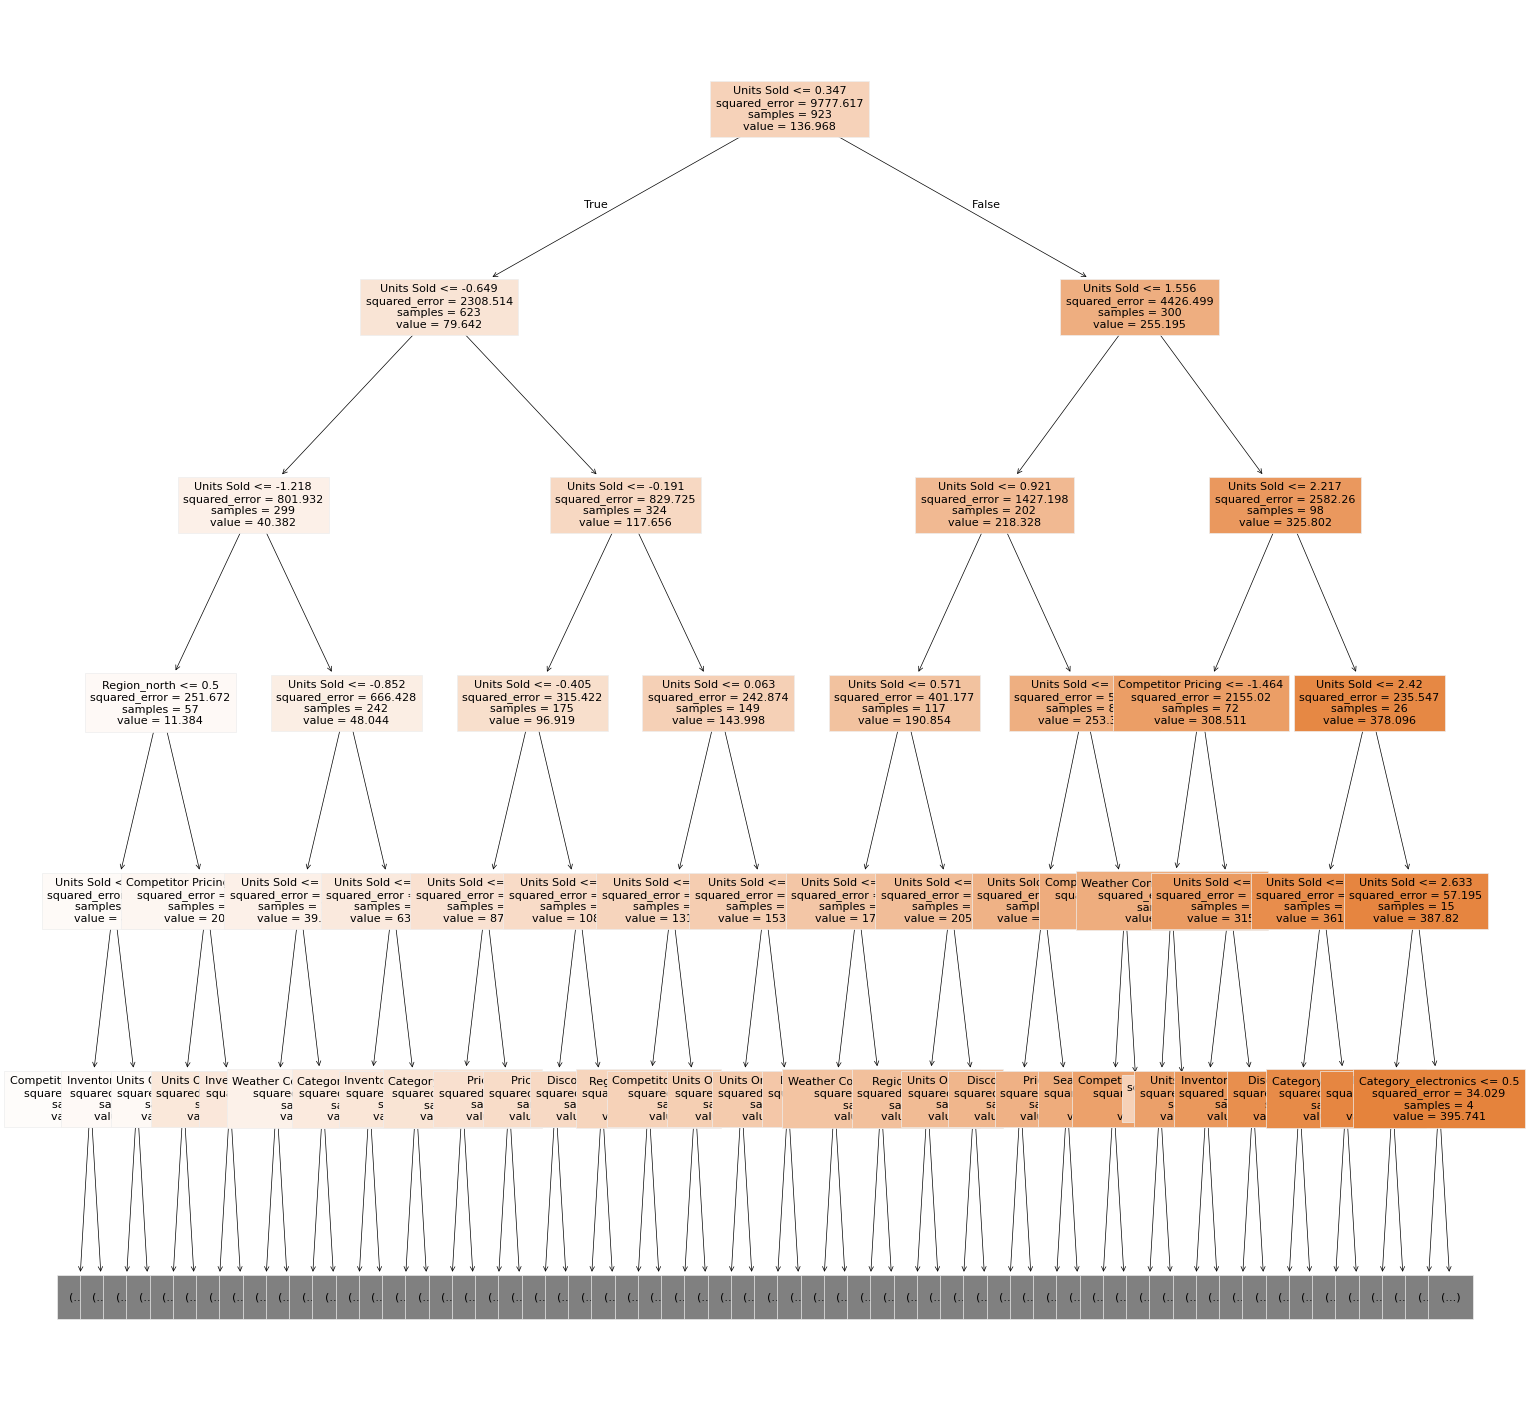

In [181]:
# Tree Visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(18,18))
plot_tree(rf.estimators_[0],filled=True,fontsize=8,feature_names=xtrain.columns,max_depth=5)
plt.show()

**Xgb Regressor**

### XGBoost Regressor: It’s a powerful model that builds multiple decision trees in a sequence, improving performance with each tree. It’s very efficient for large datasets.

- Model Training: It creates an instance of the XGBRegressor model and trains it using the training data (xtrain and ytrain).
- It retrieves the hyperparameters of the trained XGBoost model, which include settings like learning rate, max depth, number of estimators, etc. Understanding the hyperparameters helps in tuning the model for better performance and controlling how the model learns from the data.

In [182]:
# Model Training
# Create an instance of XGBRegressor
xgb_model = XGBRegressor()
# Fit the XGBoost Regressor model
xgb_model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
# Get the hyperparameters of the XGBoost model
xgb_params = xgb_model.get_params()
# Print the hyperparameters
print(xgb_params)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


####  Model Evaluation<a id='eval'>


Importing MSE and r2_score to evaluate regression models using MSE and R² for accuracy and variance explanation, and cross-validation to ensure reliable and robust performance across data splits.

In [184]:
# Libraries
from sklearn.metrics import mean_squared_error, r2_score
# Sklearn library
from sklearn.model_selection import cross_val_score

- Taking Saved User Defined Function for all models Evaluation

In [185]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression',
        'Ridge Regression','Support Vector Regressor','KNN regressor','Decision Tree Regressor','RandomForest Regressor',
         'XGBRegressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge, 'svr':svr, 'knn':knn, 'dt':dt,'rf':rf, 'xgb':xgb}

In [186]:
X = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([ytrain, ytest], axis = 0)

In [187]:
X.shape, y.shape

((1964, 21), (1964,))

It evaluates multiple regression models, including polynomial regression, using metrics like RMSE and R² for training and testing data. It determines each model's performance as Goodfit, Overfit, Underfit, or Nofit based on bias-variance trade-off and conducts cross-validation to assess generalization. The results are summarized in a DataFrame for easy comparison of model performance.

In [188]:
# Ensure correct model instance for XGBRegressor
models = {
    'mlr': mlr,
    'poly': poly,
    'lasso': lasso,
    'ridge': ridge,
    'svr': svr,
    'knn': knn,
    'dt': dt,
    'rf': rf,
    'xgb': xgb_regressor  # Correct XGBRegressor instance
}

# Resetting lists for results
trainRMSE, testRMSE = [], []
trainscore, testscore = [], []
fit, crossvalscore = [], []

# Fit all models before evaluation loop
for name, model in models.items():
    if name == 'poly':  # Handle Polynomial Regression
        ptrain = xtrain.iloc[:, 0:8]
        poly_train = polyfeat.fit_transform(ptrain)
        model.fit(poly_train, ytrain)  # Fit on transformed features
    else:
        model.fit(xtrain, ytrain)  # Fit all other models

# Model Evaluation Loop
for name, model in models.items():
    if name == 'poly':  # Handle Polynomial Features Separately
        # Transform features for polynomial regression
        ptrain = xtrain.iloc[:, 0:8]
        ptest = xtest.iloc[:, 0:8]
        pftrain = polyfeat.transform(ptrain)
        pftest = polyfeat.transform(ptest)

        # Predictions and Metrics
        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, model.predict(pftrain))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, model.predict(pftest))), 2))
        trainscore.append(round(r2_score(ytrain, model.predict(pftrain)), 2))
        testscore.append(round(r2_score(ytest, model.predict(pftest)), 2))

        # Bias-Variance Trade-Off
        trscore = r2_score(ytrain, model.predict(pftrain))
        tescore = r2_score(ytest, model.predict(pftest))
        if trscore >= 0.60 and tescore >= 0.60:
            fit.append("Goodfit" if abs(trscore - tescore) < 0.10 else "Overfit")
        elif trscore < 0.60 and tescore < 0.60:
            fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation for Polynomial Regression
        scores = cross_val_score(model, polyfeat.transform(X.iloc[:, 0:8]), y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))
    else:
        # General case for other models
        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, model.predict(xtrain))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, model.predict(xtest))), 2))
        trainscore.append(round(r2_score(ytrain, model.predict(xtrain)), 2))
        testscore.append(round(r2_score(ytest, model.predict(xtest)), 2))

        # Bias-Variance Trade-Off
        trscore = r2_score(ytrain, model.predict(xtrain))
        tescore = r2_score(ytest, model.predict(xtest))
        if trscore >= 0.60 and tescore >= 0.60:
            fit.append("Goodfit" if abs(trscore - tescore) < 0.10 else "Overfit")
        elif trscore < 0.60 and tescore < 0.60:
            fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation for Other Models
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))

# Results DataFrame
results_df = pd.DataFrame({
    'Model': names,
    'Trainedmodel':models.values(),
    'Train RMSE': trainRMSE,
    'Test RMSE': testRMSE,
    'Train R2': trainscore,
    'Test R2': testscore,
    'Cross-validation Score': crossvalscore,
    'Fit': fit
})

# Display Results
pd.set_option('display.float_format', lambda x: f"{x:.3f}")
display(results_df)


,Model,Trainedmodel,Train RMSE,Test RMSE,Train R2,Test R2,Cross-validation Score,Fit
0,Multiple Linear Regression,LinearRegression(),21.540,22.040,0.950,0.940,0.950,Goodfit
1,Polynomial Regression,LinearRegression(),21.380,22.440,0.950,0.940,0.950,Goodfit
2,Lasso Regression,Lasso(alpha=0.1),21.550,22.000,0.950,0.940,0.950,Goodfit
3,Ridge Regression,Ridge(),21.540,22.040,0.950,0.940,0.950,Goodfit
4,Support Vector Regressor,SVR(),65.190,61.190,0.560,0.560,0.490,Underfit
5,KNN regressor,KNeighborsRegressor(),34.890,41.190,0.870,0.800,0.810,Goodfit
6,Decision Tree Regressor,DecisionTreeRegressor(random_state=0),0.000,32.330,1.000,0.880,0.860,Overfit
7,RandomForest Regressor,"(DecisionTreeRegressor(max_features=1.0, rando...",9.050,24.270,0.990,0.930,0.940,Goodfit
8,XGBRegressor,"XGBRegressor(base_score=None, booster=None, ca...",17.470,22.960,0.970,0.940,0.940,Goodfit


In [189]:
y

,Demand Forecast
755,33.100
340,276.130
977,36.580
1203,81.750
1163,23.490
...,...
1075,179.930
177,141.456
580,213.220
1685,24.540


The statistics of the 'Demand Forecast' column to understand its distribution- mean, min, max, quartiles.

In [190]:
# Checking Demand Forecast Distribution to Understand RMSE
df['Demand Forecast'].describe()

,Demand Forecast
count,1964.000
mean,136.084
std,96.562
min,-8.370
25%,56.050
50%,122.165
75%,192.637
max,403.880


In [191]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(1473, 21) (1473,) (491, 21) (491,)


####  Model Deployment<a id='dep'>


In [192]:
xgb_hyp = xgb.XGBRegressor()
xgb_hyp.fit(xtrain, ytrain)  # Replace with your actual training data


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


The import joblib - imports the joblib library, which is used for saving and loading of Python objects like models, scalers, or datasets. It is commonly used in machine learning pipelines to  trained models or preprocessed objects as binary files (e.g., .pkl) for future use, ensuring quick and reliable reloading without retraining.

It saves trained objects, scaler (sc) and a hyperparameter-tuned XGBoost model (xgb_hyp), as .pkl files using joblib, allowing them to be reused later without retraining.

In [193]:
import pickle
with open('Demand_Forecast.pkl', 'wb') as file:
    pickle.dump(xgb_hyp, file)

In [194]:
with open ('scale.pkl', 'wb') as file:
    pickle.dump(sc, file)

#### Real Time Prediction<a id='pred'>




Saved objects - the scaler (sc) and the tuned XGBoost model (xgb_hyp), from .pkl files using joblib, allowing them to be reused directly for predictions or further analysis.

####  Real Time Prediction<a id='pred'>

  
* Using Saved best model to predict future given data

In [195]:
print(X.columns)

Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Holiday/Promotion', 'Competitor Pricing', 'Seasonality',
       'Category_clothing', 'Category_electronics', 'Category_furniture',
       'Category_groceries', 'Category_toys', 'Region_east', 'Region_north',
       'Region_south', 'Region_west', 'Weather Condition_cloudy',
       'Weather Condition_rainy', 'Weather Condition_snowy',
       'Weather Condition_sunny'],
      dtype='object')


The function estimate() uses input data from the user to forecast demand. It collects inputs such as pricing, inventory, seasonality, and other features, aligns them with the feature requirements of the trained model, scales numerical values, and forecasts demand using the trained XGBoost model (xgb_hyp).

In [196]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the model and scaler are already loaded (replace 'xgb_hyp' with your trained model)
# Ensure you have fitted the scaler as 'sc'

def Estimate():
    print("Estimation of Output Built on Below Input Data:")

    inpdata = pd.read_csv("/content/DemandForecast.csv")  # Replace with your input CSV file
    print(inpdata.columns)  # Print column names to ensure correct grouping
    display(inpdata.head())
    print()
    print("                       Enter Your Input Data:                  ")
    print("==============================================================")
    print()

    # Collect user input
    inventory = float(input("Enter Inventory Level: "))
    units_sold = float(input("Enter Units Sold: "))
    units_ordered = float(input("Enter Units Ordered: "))
    price = float(input("Enter Price: "))
    discount = float(input("Enter Discount: "))
    print("Select Holiday/Promotion (0 for No, 1 for Yes):")
    holiday_promotion = int(input())
    competitor_pricing = float(input("Enter Competitor Pricing: "))
    seasonality = float(input("Enter Seasonality (0 for Spring, 1 for Summer, 2 for Winter, 3 for Autumn): "))

    print("Select Category:")
    print(["Electronics", "Furniture", "Groceries", "Toys"])
    category = input().lower()
    category_electronics = 1 if category == "electronics" else 0
    category_furniture = 1 if category == "furniture" else 0
    category_groceries = 1 if category == "groceries" else 0
    category_toys = 1 if category == "toys" else 0

    print("Select Region:")
    print(["North", "South", "West", "East"])
    region = input().lower()
    region_north = 1 if region == "north" else 0
    region_south = 1 if region == "south" else 0
    region_west = 1 if region == "west" else 0
    region_east = 1 if region == "east" else 0

    print("Select Weather Condition:")
    print(["Rainy", "Snowy", "Sunny", "Cloudy"])
    weather = input().lower()
    weather_rainy = 1 if weather == "rainy" else 0
    weather_snowy = 1 if weather == "snowy" else 0
    weather_sunny = 1 if weather == "sunny" else 0
    weather_cloudy = 1 if weather == "cloudy" else 0

    # Create a DataFrame for the user input
    row = pd.DataFrame([[inventory, units_sold, units_ordered, price, discount, holiday_promotion,
                         competitor_pricing, seasonality,
                         category_electronics, category_furniture, category_groceries, category_toys,
                         region_north, region_south, region_west, region_east,
                         weather_rainy, weather_snowy, weather_sunny, weather_cloudy]],
                       columns=[
                           "Inventory Level", "Units Sold", "Units Ordered", "Price", "Discount",
                           "Holiday/Promotion", "Competitor Pricing", "Seasonality",
                           "Category_electronics", "Category_furniture", "Category_groceries",
                           "Category_toys", "Region_north", "Region_south", "Region_west", "Region_east",
                           "Weather Condition_rainy", "Weather Condition_snowy", "Weather Condition_sunny",
                           "Weather Condition_cloudy"
                       ])

    print("Given Input Data:")
    display(row)

    # Ensure the input data matches model training data columns
    model_features = xgb_hyp.feature_names_in_  # Get the model's expected feature names
    row = row.reindex(columns=model_features, fill_value=0)  # Align and fill missing columns with 0

    # Apply scaling only to the numerical features (ignoring categorical ones)
    numerical_columns = ["Inventory Level", "Units Sold", "Units Ordered", "Price", "Discount",
                         "Holiday/Promotion", "Competitor Pricing", "Seasonality"]

    try:
        row[numerical_columns] = sc.transform(row[numerical_columns])  # Apply scaling to numerical features
    except Exception as e:
        print(f"Error during scaling: {e}")

    # Predict the value using the trained model
    try:
        prediction = round(xgb_hyp.predict(row)[0], 2)  # Assuming xgb_hyp is your trained model
        print(f"Estimated Demand Value: ${prediction}")
    except Exception as e:
        print(f"An error occurred during prediction: {e}")

Estimate()


Estimation of Output Built on Below Input Data:
Index(['Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,groceries,north,231.000,127,55,33.500,20,rainy,0,29.690,autumn
1,toys,south,204.000,150,66,63.010,20,sunny,0,66.160,autumn
2,toys,west,102.000,65,51,27.990,10,sunny,1,31.320,summer
3,toys,north,469.000,61,164,32.720,10,cloudy,1,34.740,autumn
4,toys,east,166.000,14,135,73.640,0,sunny,0,68.950,summer



                       Enter Your Input Data:                  

Enter Inventory Level: 1
Enter Units Sold: 1
Enter Units Ordered: 1
Enter Price: 1
Enter Discount: 1
Select Holiday/Promotion (0 for No, 1 for Yes):
1
Enter Competitor Pricing: 1
Enter Seasonality (0 for Spring, 1 for Summer, 2 for Winter, 3 for Autumn): 2
Select Category:
['Electronics', 'Furniture', 'Groceries', 'Toys']
2
Select Region:
['North', 'South', 'West', 'East']
2
Select Weather Condition:
['Rainy', 'Snowy', 'Sunny', 'Cloudy']
2
Given Input Data:


,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Category_electronics,Category_furniture,Category_groceries,Category_toys,Region_north,Region_south,Region_west,Region_east,Weather Condition_rainy,Weather Condition_snowy,Weather Condition_sunny,Weather Condition_cloudy
0,1.000,1.000,1.000,1.000,1.000,1,1.000,2.000,0,0,0,0,0,0,0,0,0,0,0,0


Estimated Demand Value: $13.949999809265137
